In [1]:
import csv
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from PIL import Image

# import keras

from pymongo import MongoClient

from ajna_commons.conf import ENCODE
from ajna_commons.flask.conf import DATABASE, MONGODB_URI
from ajna_commons.utils.images import get_imagens_recortadas

Fazendo log de erros e alertas no arquivo  /home/ivan/pybr/ajna_docs/padma/ajna_commons/flask/error.log
Fazendo log de atividade no arquivo  /home/ivan/pybr/ajna_docs/padma/ajna_commons/flask/access.log
2018-07-16 21:01:47,111 INFO Configuração de log efetuada


INFO:ajna:Configuração de log efetuada


In [2]:
sys.path.insert(0, '../../virasana/')
# from virasana.integracao import carga, CHAVES_GRIDFS
# from virasana.exportacao.utils import campos_mongo_para_lista

ENCONTRADOS = {'metadata.carga.atracacao.escala': {'$ne': None},
               'metadata.contentType': 'image/jpeg'}


In [4]:
def get_lista(db, start, end):
    
    filtro = ENCONTRADOS
    filtro['metadata.predictions.bbox'] = {'$exists': True, '$ne': None}
    filtro['metadata.dataescaneamento'] = {
        '$gt': datetime.strptime(start, '%Y-%m-%d'),
        '$lt': datetime.strptime(end, '%Y-%m-%d')
    }
    filtro['metadata.carga.vazio'] = False
    return db['fs.files'].find(filtro)
    # chaves = ['_id'] + CHAVES_GRIDFS + carga.CHAVES_CARGA
    # return campos_mongo_para_lista(db, filtro, chaves, batch_size)

def get_images(db, lista):
    imagens = []
    for linha in lista:
        _id = linha['_id']
        imagens.append([im for im in get_imagens_recortadas(db, _id)])
    return imagens



In [5]:
db = MongoClient(host=MONGODB_URI)[DATABASE]

cursor = get_lista(db, '2017-07-01', '2017-07-15')
lista = [linha for linha in cursor]

In [6]:
linha = lista[1]
print(linha)


{'metadata': {'truckid': '20170701002613000R', 'numeroinformado': 'CAXU7341300', 'recintoid': '1', 'id': 'ALFSTS:37', 'carga': {'container': [{'container': 'caxu7341300', 'tipo': "passive upper vents(20'/8'6'')", 'volumeitem': '0000000026,000', 'quantidadebloqueiosinativos': '00', 'item': '1331', 'capacidade': '20', 'taracontainer': '002170,000', '_id': ObjectId('5ab121412a87955c6c2c15ad'), 'quantidadebloqueiosativos': '00', 'lacre1': 'br0812878', 'pesobrutoitem': '000026700,000', 'conhecimento': '151707132213967'}], 'atracacao': {'horadesatracacao': '10:55:00', 'datadesatracacao': '03/07/2017', 'localatracacao': 'btp-1', 'escala': '17000192605', 'codigoterminal': 'brssz058', 'horaatracacao': '18:42:00', '_id': ObjectId('5aa833cc2a879534fffa2b42'), 'dataatracacaoiso': datetime.datetime(2017, 7, 2, 18, 42), 'situacao': 'atracada', 'dataatracacao': '02/07/2017', 'nometerminal': 'brasil terminal portuario - btp'}, 'vazio': False, 'ncm': [{'descricao': 'granalhas e po de ferro fundido brut

In [7]:
print(len(lista))

4796


In [8]:
images = get_images(db, lista)
print(len(images))

4796


In [15]:
pesos = []
for linha in lista:
    carga = linha.get('metadata').get('carga')
    #print(carga)
    if carga:
        vazio = carga.get('vazio')
        # print(vazio)
        if vazio is False:
            container = carga.get('container')
            if container:
                tara = float(container[0].get('taracontainer').replace(',', '.'))
                peso = float(container[0].get('pesobrutoitem').replace(',', '.'))
                pesos.append(tara + peso)
print(pesos)



[26970.0, 28870.0, 29086.4, 28870.0, 21637.5, 15625.2, 29688.0, 29698.0, 22486.5, 23440.0, 22446.5, 23440.0, 28910.0, 23470.0, 29718.0, 29688.0, 29668.0, 29768.0, 23827.5, 23807.2, 23500.0, 23827.5, 29697.0, 23440.0, 21610.0, 22220.0, 23957.2, 23440.0, 15312.0, 20773.0, 23837.0, 21560.0, 23957.0, 23440.0, 30504.0, 21540.0, 30459.0, 23440.0, 30195.0, 23560.0, 23450.0, 23470.0, 23807.0, 21560.0, 21590.0, 28360.0, 22270.0, 29768.0, 29668.0, 21210.0, 29668.0, 29688.0, 29688.0, 29768.0, 29688.0, 29688.0, 29698.0, 29688.0, 29668.0, 29688.0, 29688.0, 29808.0, 29653.0, 29668.0, 29688.0, 29768.0, 29688.0, 29718.0, 29688.0, 29768.0, 29688.0, 29698.0, 29688.0, 29688.0, 28870.0, 29678.0, 23997.0, 29176.0, 29718.0, 16080.0, 32400.48, 32654.89, 32547.16, 32544.84, 32638.37, 32494.56, 32566.81, 32660.97, 33436.509999999995, 33434.4, 32707.58, 32420.89, 32568.88, 33302.14, 33333.92, 32568.88, 32518.85, 33361.259999999995, 33427.89, 33385.5, 33499.979999999996, 33359.53, 32516.55, 32401.82, 32661.98, 3

[2479 1009 3870 4762  173 2050 2201 2819 1447 2399 4716 2193 3017 1028
 3063  363 2299 3271 3018 3828 2051 1447 1516 3440 3315 4131 1519 4771
  114 2767 2570 2115 1811 2295 1483  502 1125 3020 2455 4167 3660]


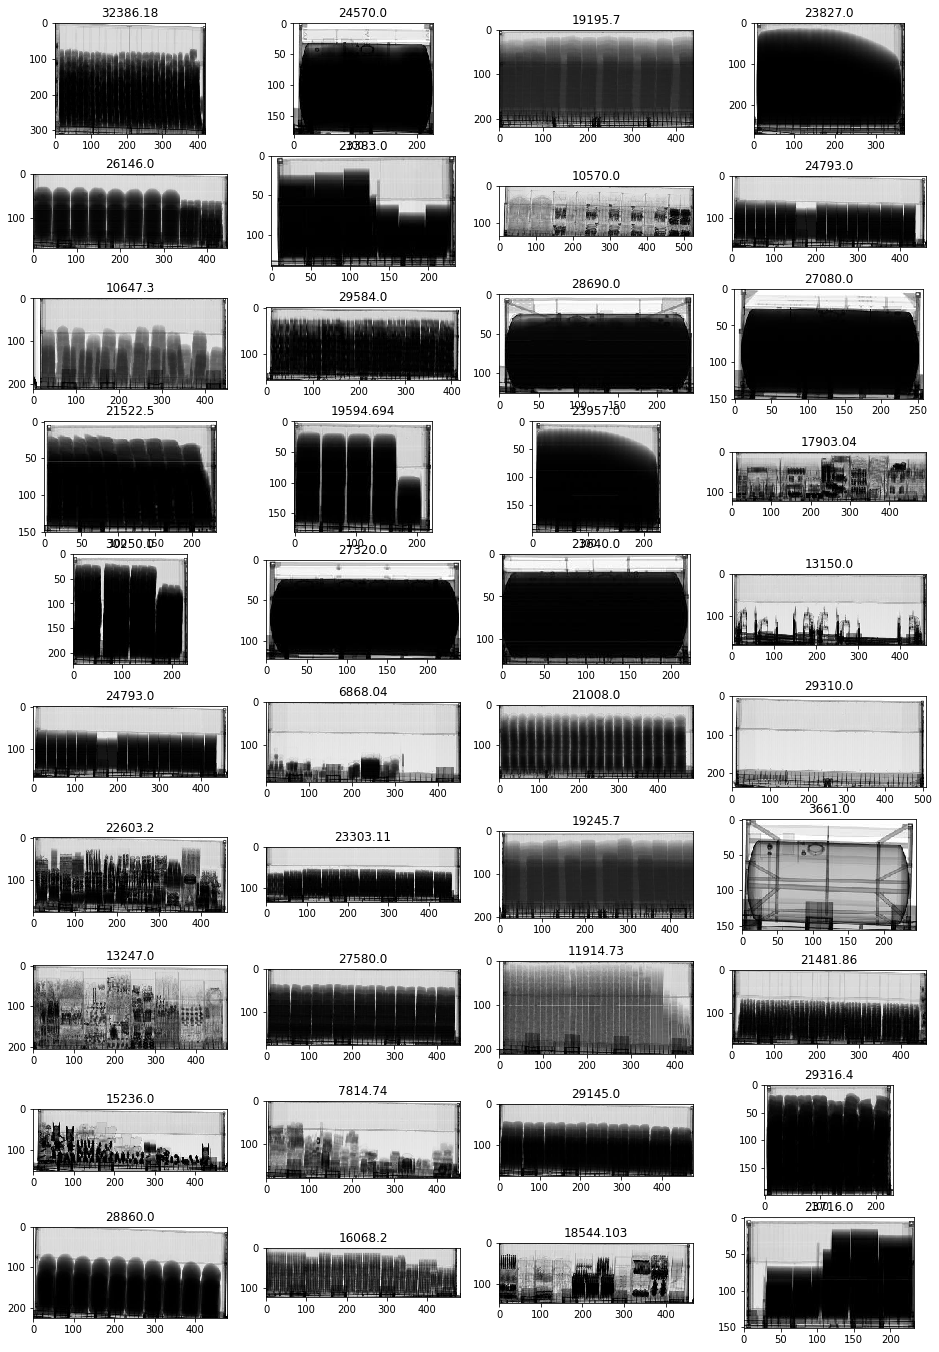

In [18]:
%matplotlib inline

    
fig=plt.figure(figsize=(16, 24))
columns = 4
rows = 10

indexes = np.random.randint(len(images) - 1, size=columns*rows + 1)
print(indexes)

for i in range(1, columns*rows +1):
    img = images[indexes[i]][0]
    ax = fig.add_subplot(rows, columns, i)
    ax.set(title=str(pesos[indexes[i]]))
    plt.imshow(img)
plt.show()


In [19]:
histograms = [np.histogram(np.asarray(image[0]), bins=4, density=True)[0] for image in images]
histograms
    

[array([0.00650994, 0.00198669, 0.00206069, 0.00512895]),
 array([0.01017117, 0.00141013, 0.0007901 , 0.00331487]),
 array([0.0123524 , 0.00076239, 0.00062135, 0.00195014]),
 array([0.00323375, 0.00223554, 0.00245395, 0.00776303]),
 array([0.0116017 , 0.00109749, 0.00079287, 0.00219421]),
 array([0.00404398, 0.00675084, 0.00375408, 0.00113737]),
 array([0.00871939, 0.00063474, 0.00106804, 0.00526411]),
 array([0.00851654, 0.00057851, 0.00098072, 0.00561051]),
 array([0.01208935, 0.00078333, 0.00063682, 0.00217677]),
 array([0.01111847, 0.00108733, 0.00102386, 0.00245661]),
 array([0.01181877, 0.00091805, 0.00047437, 0.00247509]),
 array([0.0114361 , 0.00122248, 0.0008462 , 0.00218149]),
 array([0.0088964 , 0.0012264 , 0.00096727, 0.00459621]),
 array([0.01055486, 0.00112986, 0.00096097, 0.00304058]),
 array([0.00824137, 0.00053546, 0.00102704, 0.00588241]),
 array([0.00818259, 0.00059958, 0.00103455, 0.00586956]),
 array([0.00846301, 0.00075086, 0.00083601, 0.00563639]),
 array([0.0083

In [21]:
df = pd.DataFrame(histograms)
print(np.histogram(np.asarray(images[0][0]), bins=4, density=True)[1])
df.columns = np.histogram(np.asarray(images[0][0]), bins=4, density=True)[1][1:]
df['peso'] = pesos
print(len(pesos))
print(len(df))
df

[  0.    63.75 127.5  191.25 255.  ]
4796
4796


63.75     127.5    191.25     255.0       peso
0     0.006510  0.001987  0.002061  0.005129  26970.000
1     0.010171  0.001410  0.000790  0.003315  28870.000
2     0.012352  0.000762  0.000621  0.001950  29086.400
3     0.003234  0.002236  0.002454  0.007763  28870.000
4     0.011602  0.001097  0.000793  0.002194  21637.500
5     0.004044  0.006751  0.003754  0.001137  15625.200
6     0.008719  0.000635  0.001068  0.005264  29688.000
7     0.008517  0.000579  0.000981  0.005611  29698.000
8     0.012089  0.000783  0.000637  0.002177  22486.500
9     0.011118  0.001087  0.001024  0.002457  23440.000
10    0.011819  0.000918  0.000474  0.002475  22446.500
11    0.011436  0.001222  0.000846  0.002181  23440.000
12    0.008896  0.001226  0.000967  0.004596  28910.000
13    0.010555  0.001130  0.000961  0.003041  23470.000
14    0.008241  0.000535  0.001027  0.005882  29718.000
15    0.008183  0.000600  0.001035  0.005870  29688.000
16    0.008463  0.000751  0.000836  0.005636  29668.000
17    0.008341  0.000566  0.001041  0.005738  29768.000
18    0.012167  0.000986  0.000863  0.001670  23827.500
19    0.012389  0.000875  0.000728  0.001694  23807.200
20    0.010867  0.001080  0.000957  0.002784  23500.000
21    0.012760  0.000938  0.000808  0.001180  23827.500
22    0.008229  0.000711  0.001060  0.005687  29697.000
23    0.011103  0.001103  0.001009  0.002472  23440.000
24    0.011390  0.001027  0.000783  0.002487  21610.000
25    0.011631  0.000974  0.000721  0.002360  22220.000
26    0.012226  0.000776  0.000710  0.001974  23957.200
27    0.010942  0.001075  0.000986  0.002682  23440.000
28    0.011243  0.001844  0.001017  0.001581  15312.000
29    0.011069  0.001293  0.000935  0.002389  20773.000
...        ...       ...       ...       ...        ...
4766  0.008342  0.002700  0.001546  0.003098  17766.000
4767  0.009770  0.002894  0.001561  0.001461  19275.700
4768  0.008551  0.002647  0.001549  0.002940  18162.000
4769  0.009545  0.003051  0.001619  0.001471  19245.700
4770  0.004621  0.001507  0.001448  0.008110  11530.330
4771  0.009513  0.002973  0.001462  0.001739  19245.700
4772  0.009362  0.003020  0.001428  0.001876  19155.700
4773  0.008608  0.001520  0.001273  0.004284  24110.875
4774  0.009503  0.003179  0.001439  0.001565  19245.700
4775  0.008508  0.002817  0.001711  0.002651  17901.000
4776  0.005918  0.004080  0.001701  0.003987  14983.000
4777  0.009998  0.001433  0.001515  0.002740  23512.000
4778  0.005346  0.001469  0.001601  0.007270   8565.500
4779  0.005015  0.003680  0.002110  0.004882  20544.000
4780  0.001622  0.003075  0.003239  0.007751   8415.000
4781  0.010586  0.001082  0.001094  0.002923  21702.000
4782  0.006692  0.002461  0.001701  0.004832   7878.211
4783  0.005758  0.001702  0.001505  0.006722   8835.200
4784  0.002849  0.001175  0.001915  0.009748  11561.100
4785  0.010289  0.001480  0.001162  0.002756  21602.000
4786  0.008662  0.001295  0.000951  0.004779  13856.759
4787  0.008065  0.001475  0.001107  0.005039  22564.920
4788  0.009029  0.001657  0.000999  0.004002  22393.200
4789  0.011637  0.001174  0.000897  0.001979  23867.300
4790  0.011037  0.001174  0.000988  0.002488  29859.566
4791  0.006362  0.001109  0.001703  0.006513  25846.000
4792  0.006532  0.000965  0.001583  0.006606  28010.000
4793  0.004448  0.004794  0.002414  0.004030  20053.460
4794  0.010405  0.001337  0.001081  0.002862  30415.000
4795  0.001702  0.004464  0.003316  0.006204   3920.000

[4796 rows x 5 columns]

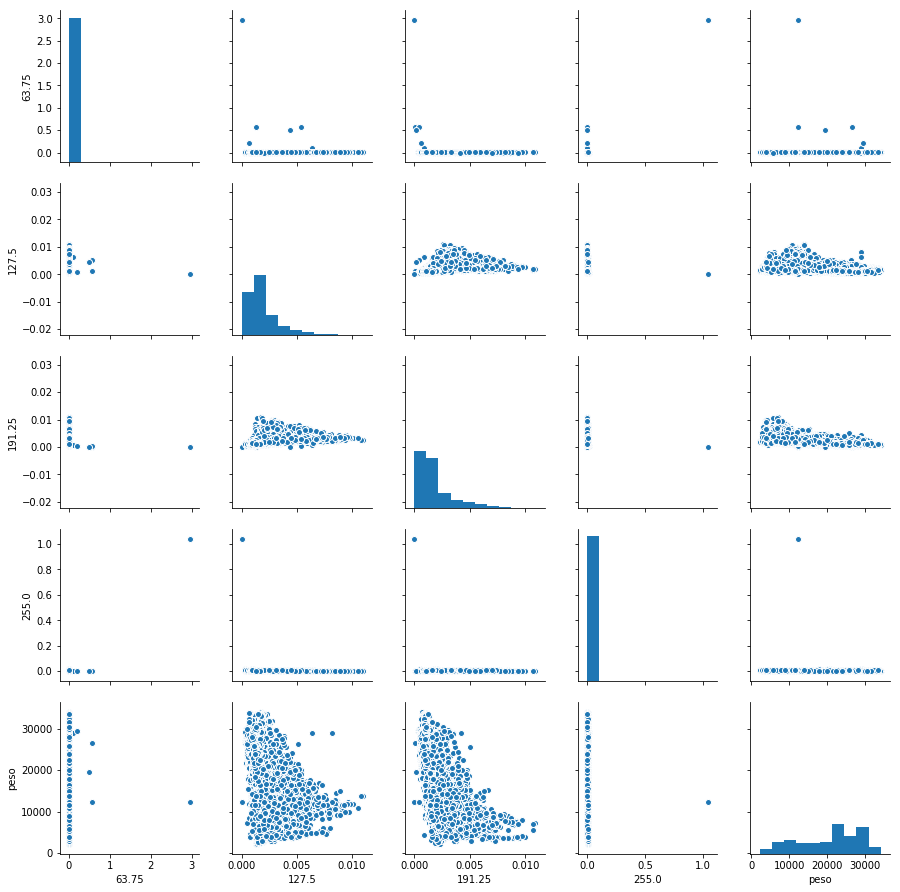

In [22]:
sns.pairplot(df)

In [24]:
for i in range(4):
    print(i, np.corrcoef(df[df.columns[i]], df['peso']))

0 [[1.         0.04778853]
 [0.04778853 1.        ]]
1 [[ 1.         -0.51196076]
 [-0.51196076  1.        ]]
2 [[ 1.         -0.69703262]
 [-0.69703262  1.        ]]
3 [[ 1.        -0.0715032]
 [-0.0715032  1.       ]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f230051cc88>,
      dtype=object)

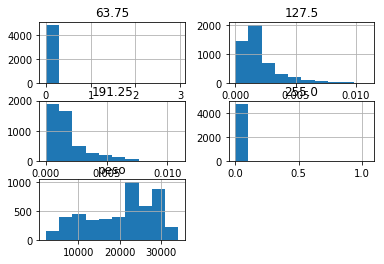

In [25]:
df.hist()

In [26]:
histograms16 = [np.histogram(np.asarray(image[0]), bins=16, density=True)[0] for image in images]
titulo16 = np.histogram(np.asarray(images[0][0]), bins=16, density=True)[1]
df16 = pd.DataFrame(histograms16)
df16.columns = titulo16[1:]
df16['peso'] = pesos

In [27]:

df16

15.9375    31.875   47.8125     63.75   79.6875    95.625  111.5625  \
0     0.016241  0.004108  0.003027  0.002664  0.002377  0.002020  0.001814   
1     0.027628  0.007066  0.003640  0.002351  0.001886  0.001696  0.001229   
2     0.043097  0.002902  0.001962  0.001448  0.001121  0.000885  0.000664   
3     0.005118  0.003026  0.002625  0.002166  0.002075  0.002200  0.002362   
4     0.038529  0.003133  0.002884  0.001861  0.001513  0.001317  0.000927   
5     0.002125  0.002805  0.004700  0.006547  0.007261  0.007048  0.006588   
6     0.030457  0.001902  0.001496  0.001023  0.000856  0.000670  0.000530   
7     0.030422  0.001734  0.001019  0.000891  0.000702  0.000622  0.000627   
8     0.039403  0.003960  0.002993  0.002002  0.001217  0.000889  0.000634   
9     0.035505  0.004173  0.002903  0.001893  0.001520  0.001135  0.000909   
10    0.038388  0.004052  0.002798  0.002038  0.001414  0.001005  0.000672   
11    0.035799  0.004510  0.003238  0.002196  0.001665  0.001366  0.001045   
12    0.025917  0.004279  0.003756  0.001633  0.001458  0.001297  0.001278   
13    0.032881  0.004441  0.002960  0.001937  0.001463  0.001237  0.001028   
14    0.029429  0.001576  0.001103  0.000858  0.000657  0.000720  0.000473   
15    0.028967  0.001620  0.001179  0.000964  0.000812  0.000606  0.000612   
16    0.029571  0.001999  0.001283  0.000999  0.000790  0.000764  0.000814   
17    0.029682  0.001663  0.001152  0.000869  0.000741  0.000736  0.000461   
18    0.041038  0.003732  0.002263  0.001635  0.001206  0.001114  0.000929   
19    0.042396  0.003666  0.002021  0.001474  0.001232  0.000996  0.000729   
20    0.033856  0.004436  0.003066  0.002109  0.001431  0.001156  0.001043   
21    0.043310  0.003831  0.002295  0.001603  0.001311  0.001048  0.000838   
22    0.028794  0.001751  0.001371  0.001000  0.000822  0.000900  0.000643   
23    0.034376  0.004963  0.003114  0.001959  0.001436  0.001152  0.001071   
24    0.037780  0.003113  0.002857  0.001810  0.001389  0.001204  0.000967   
25    0.038729  0.003972  0.002114  0.001710  0.001294  0.001042  0.000874   
26    0.041709  0.003167  0.002432  0.001596  0.001082  0.000878  0.000652   
27    0.034510  0.004250  0.002920  0.002090  0.001473  0.001117  0.001002   
28    0.028860  0.008072  0.004965  0.003077  0.002261  0.001991  0.001851   
29    0.034939  0.004457  0.002694  0.002184  0.001686  0.001647  0.001067   
...        ...       ...       ...       ...       ...       ...       ...   
4766  0.000849  0.016881  0.010881  0.004756  0.003461  0.002894  0.002445   
4767  0.000669  0.002179  0.028990  0.007241  0.003638  0.003237  0.002838   
4768  0.000624  0.019431  0.009464  0.004684  0.003278  0.002822  0.002502   
4769  0.000698  0.001950  0.028269  0.007263  0.003713  0.003575  0.002884   
4770  0.001490  0.010150  0.004836  0.002006  0.001652  0.001520  0.001320   
4771  0.001123  0.002497  0.028320  0.006111  0.004023  0.003586  0.002725   
4772  0.000792  0.002681  0.027926  0.006048  0.003601  0.003646  0.002927   
4773  0.019482  0.008215  0.004417  0.002320  0.001972  0.001555  0.001332   
4774  0.000792  0.001875  0.028175  0.007171  0.003749  0.003931  0.003011   
4775  0.001487  0.018272  0.009829  0.004444  0.003390  0.003020  0.002702   
4776  0.000631  0.007933  0.009126  0.005982  0.005067  0.003922  0.003668   
4777  0.033366  0.002645  0.002271  0.001711  0.001442  0.001362  0.001445   
4778  0.011233  0.004922  0.003280  0.001948  0.001701  0.001713  0.001311   
4779  0.007457  0.003907  0.003917  0.004779  0.004265  0.003788  0.003750   
4780  0.001153  0.001360  0.001762  0.002213  0.002694  0.002823  0.003266   
4781  0.034713  0.003651  0.002303  0.001677  0.001389  0.001264  0.000846   
4782  0.006039  0.005833  0.007218  0.007680  0.003852  0.002655  0.001777   
4783  0.013175  0.004529  0.003293  0.002035  0.002040  0.002119  0.001522   
4784  0.005688  0.002434  0.001849  0.001423  0.001178  0.001171  0.001096   
4785  0.033346  0.003362  0.0

In [28]:
for i in range(16):
    print(i, np.corrcoef(df16[df16.columns[i]], df16['peso']))

0 [[1.         0.04294166]
 [0.04294166 1.        ]]
1 [[1.         0.30662014]
 [0.30662014 1.        ]]
2 [[1.         0.01109785]
 [0.01109785 1.        ]]
3 [[ 1.         -0.13580509]
 [-0.13580509  1.        ]]
4 [[ 1.         -0.30260837]
 [-0.30260837  1.        ]]
5 [[ 1.         -0.44541673]
 [-0.44541673  1.        ]]
6 [[ 1.         -0.50757704]
 [-0.50757704  1.        ]]
7 [[ 1.        -0.5716354]
 [-0.5716354  1.       ]]
8 [[ 1.         -0.60987307]
 [-0.60987307  1.        ]]
9 [[ 1.         -0.63852395]
 [-0.63852395  1.        ]]
10 [[ 1.        -0.6578155]
 [-0.6578155  1.       ]]
11 [[ 1.         -0.61846937]
 [-0.61846937  1.        ]]
12 [[ 1.         -0.54091288]
 [-0.54091288  1.        ]]
13 [[ 1.       -0.255626]
 [-0.255626  1.      ]]
14 [[ 1.         -0.20696954]
 [-0.20696954  1.        ]]
15 [[ 1.        -0.0124985]
 [-0.0124985  1.       ]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22f9e51128>,
      dtype=object)

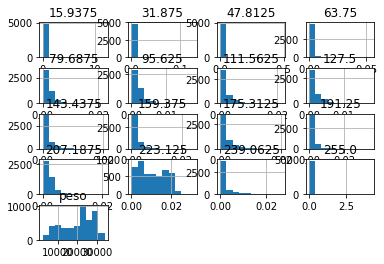

In [29]:
df16.hist()

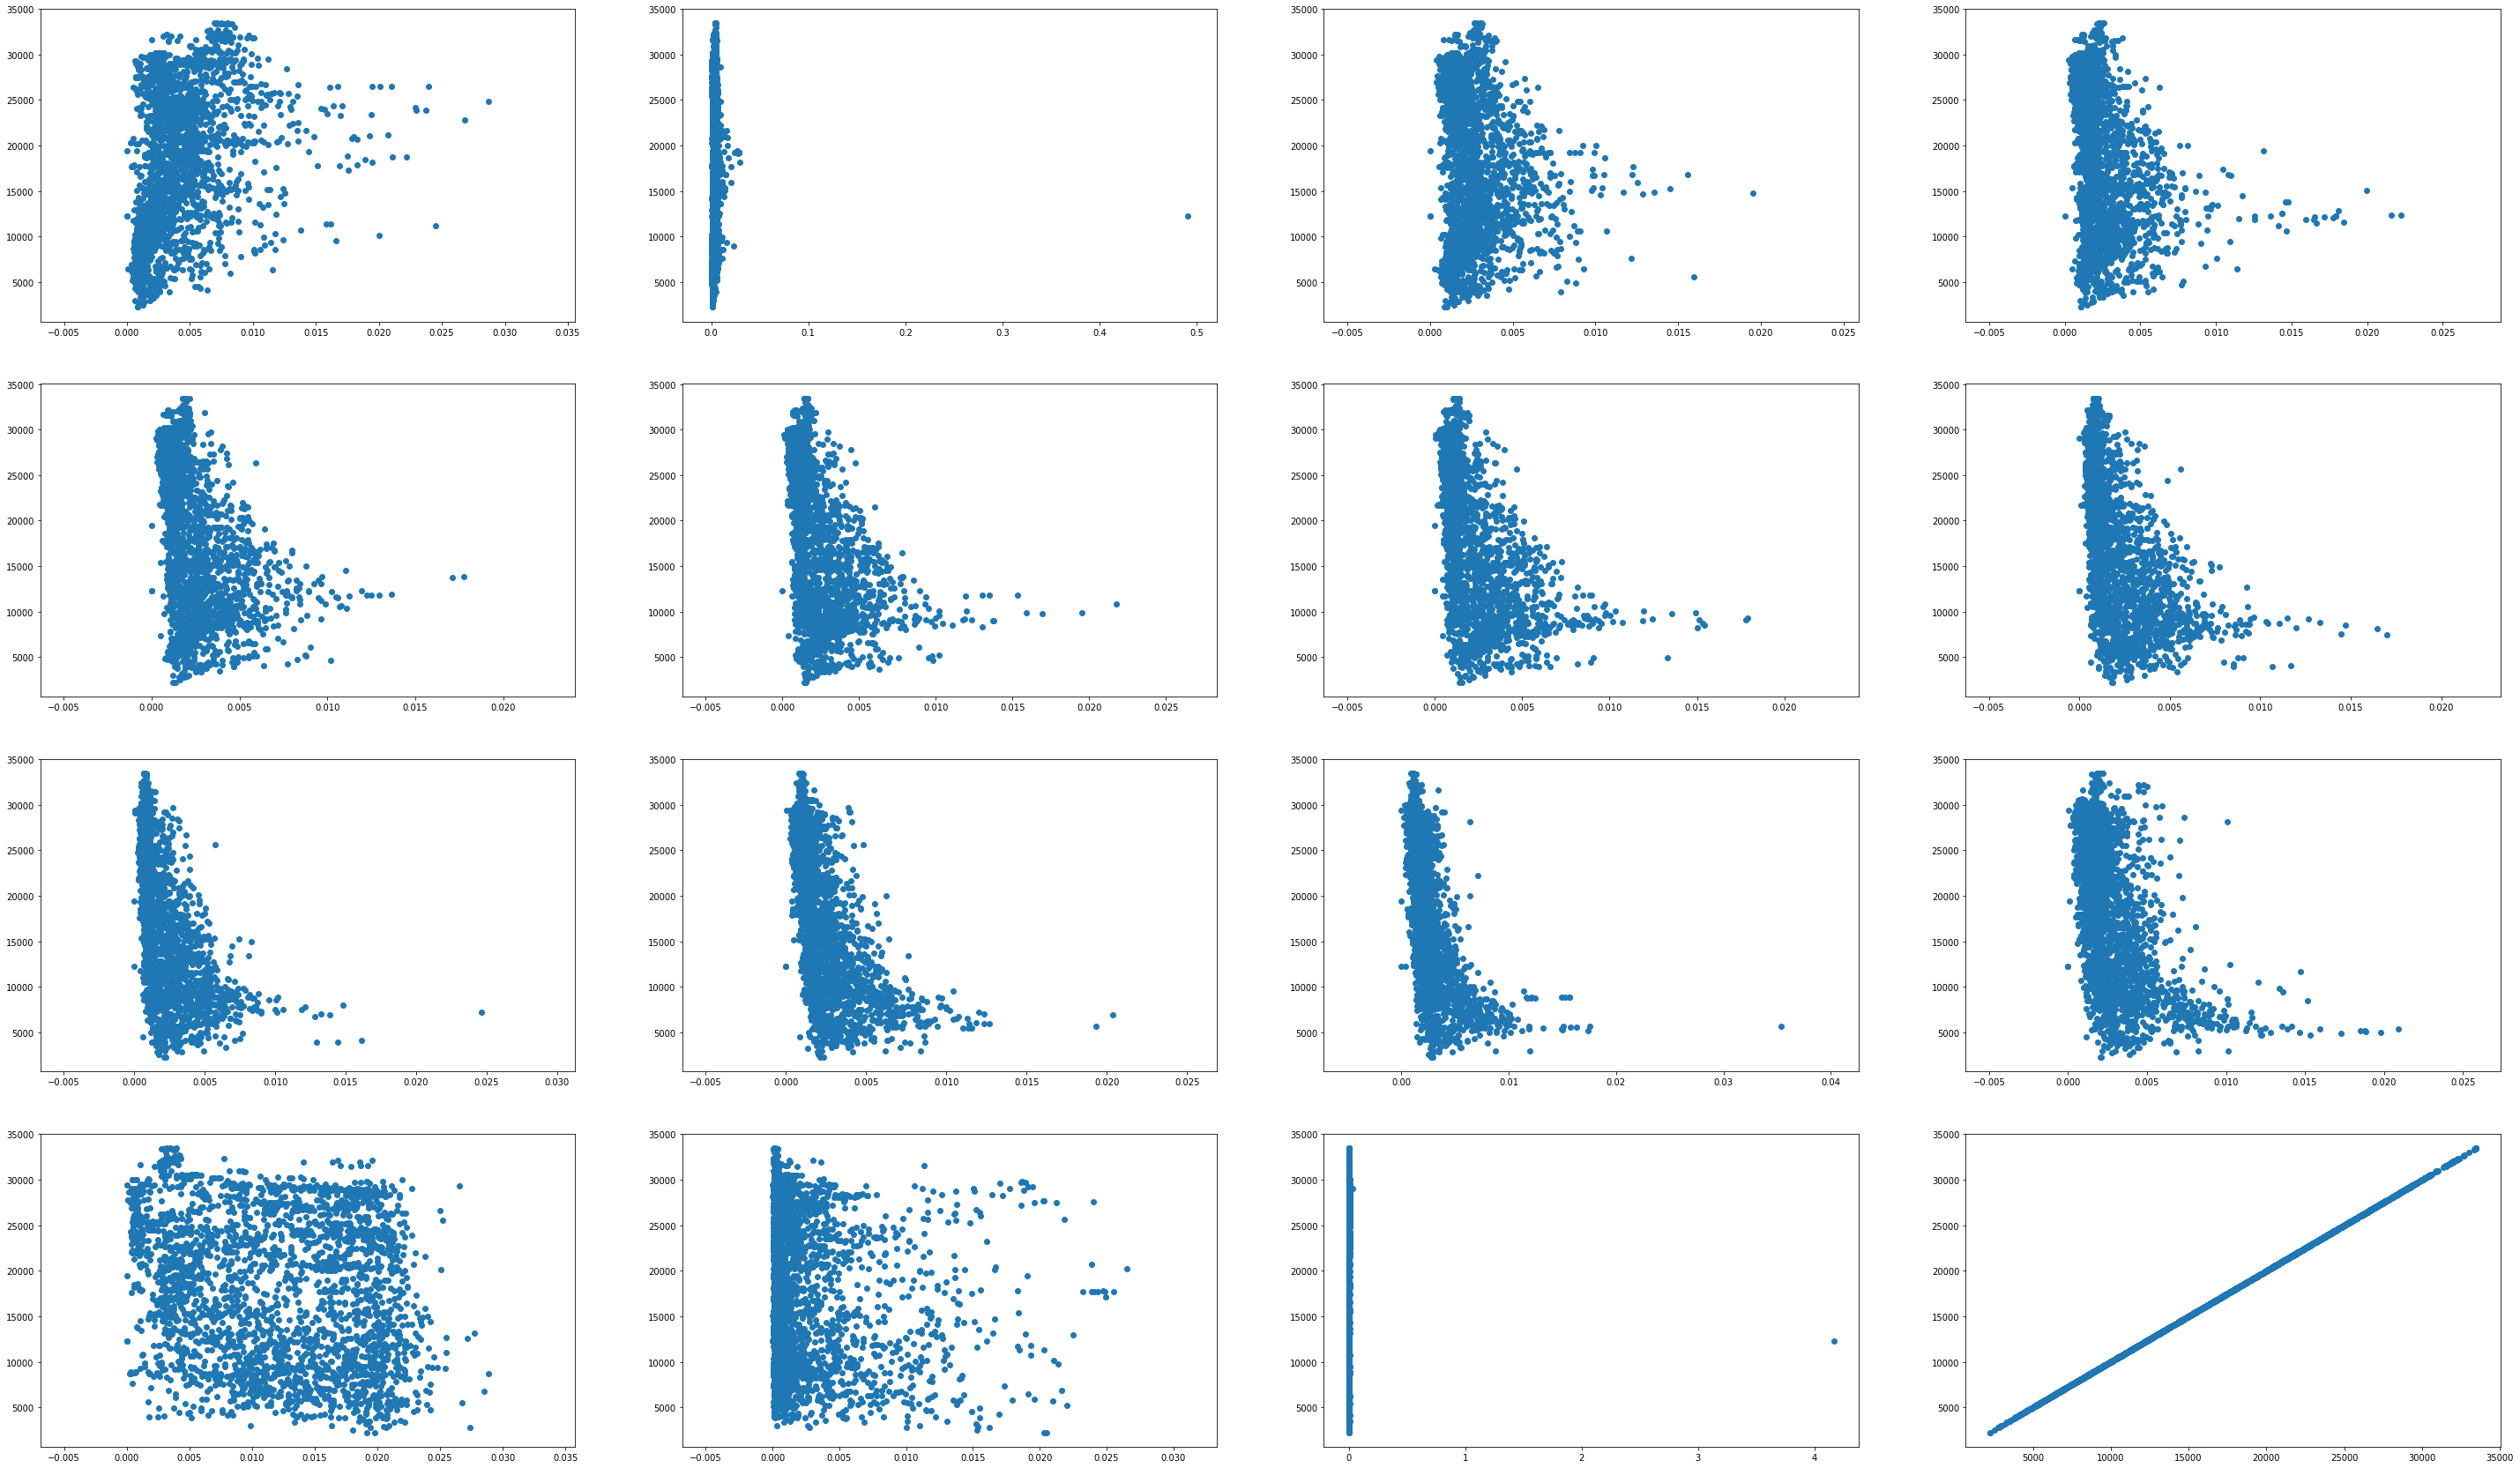

In [47]:
%matplotlib inline

fig=plt.figure(figsize=(50, 30))
columns = 4
rows = 4

for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    x = df16[df16.columns[i]]
    y = df16['peso']
    plt.scatter(x, y)
plt.show()


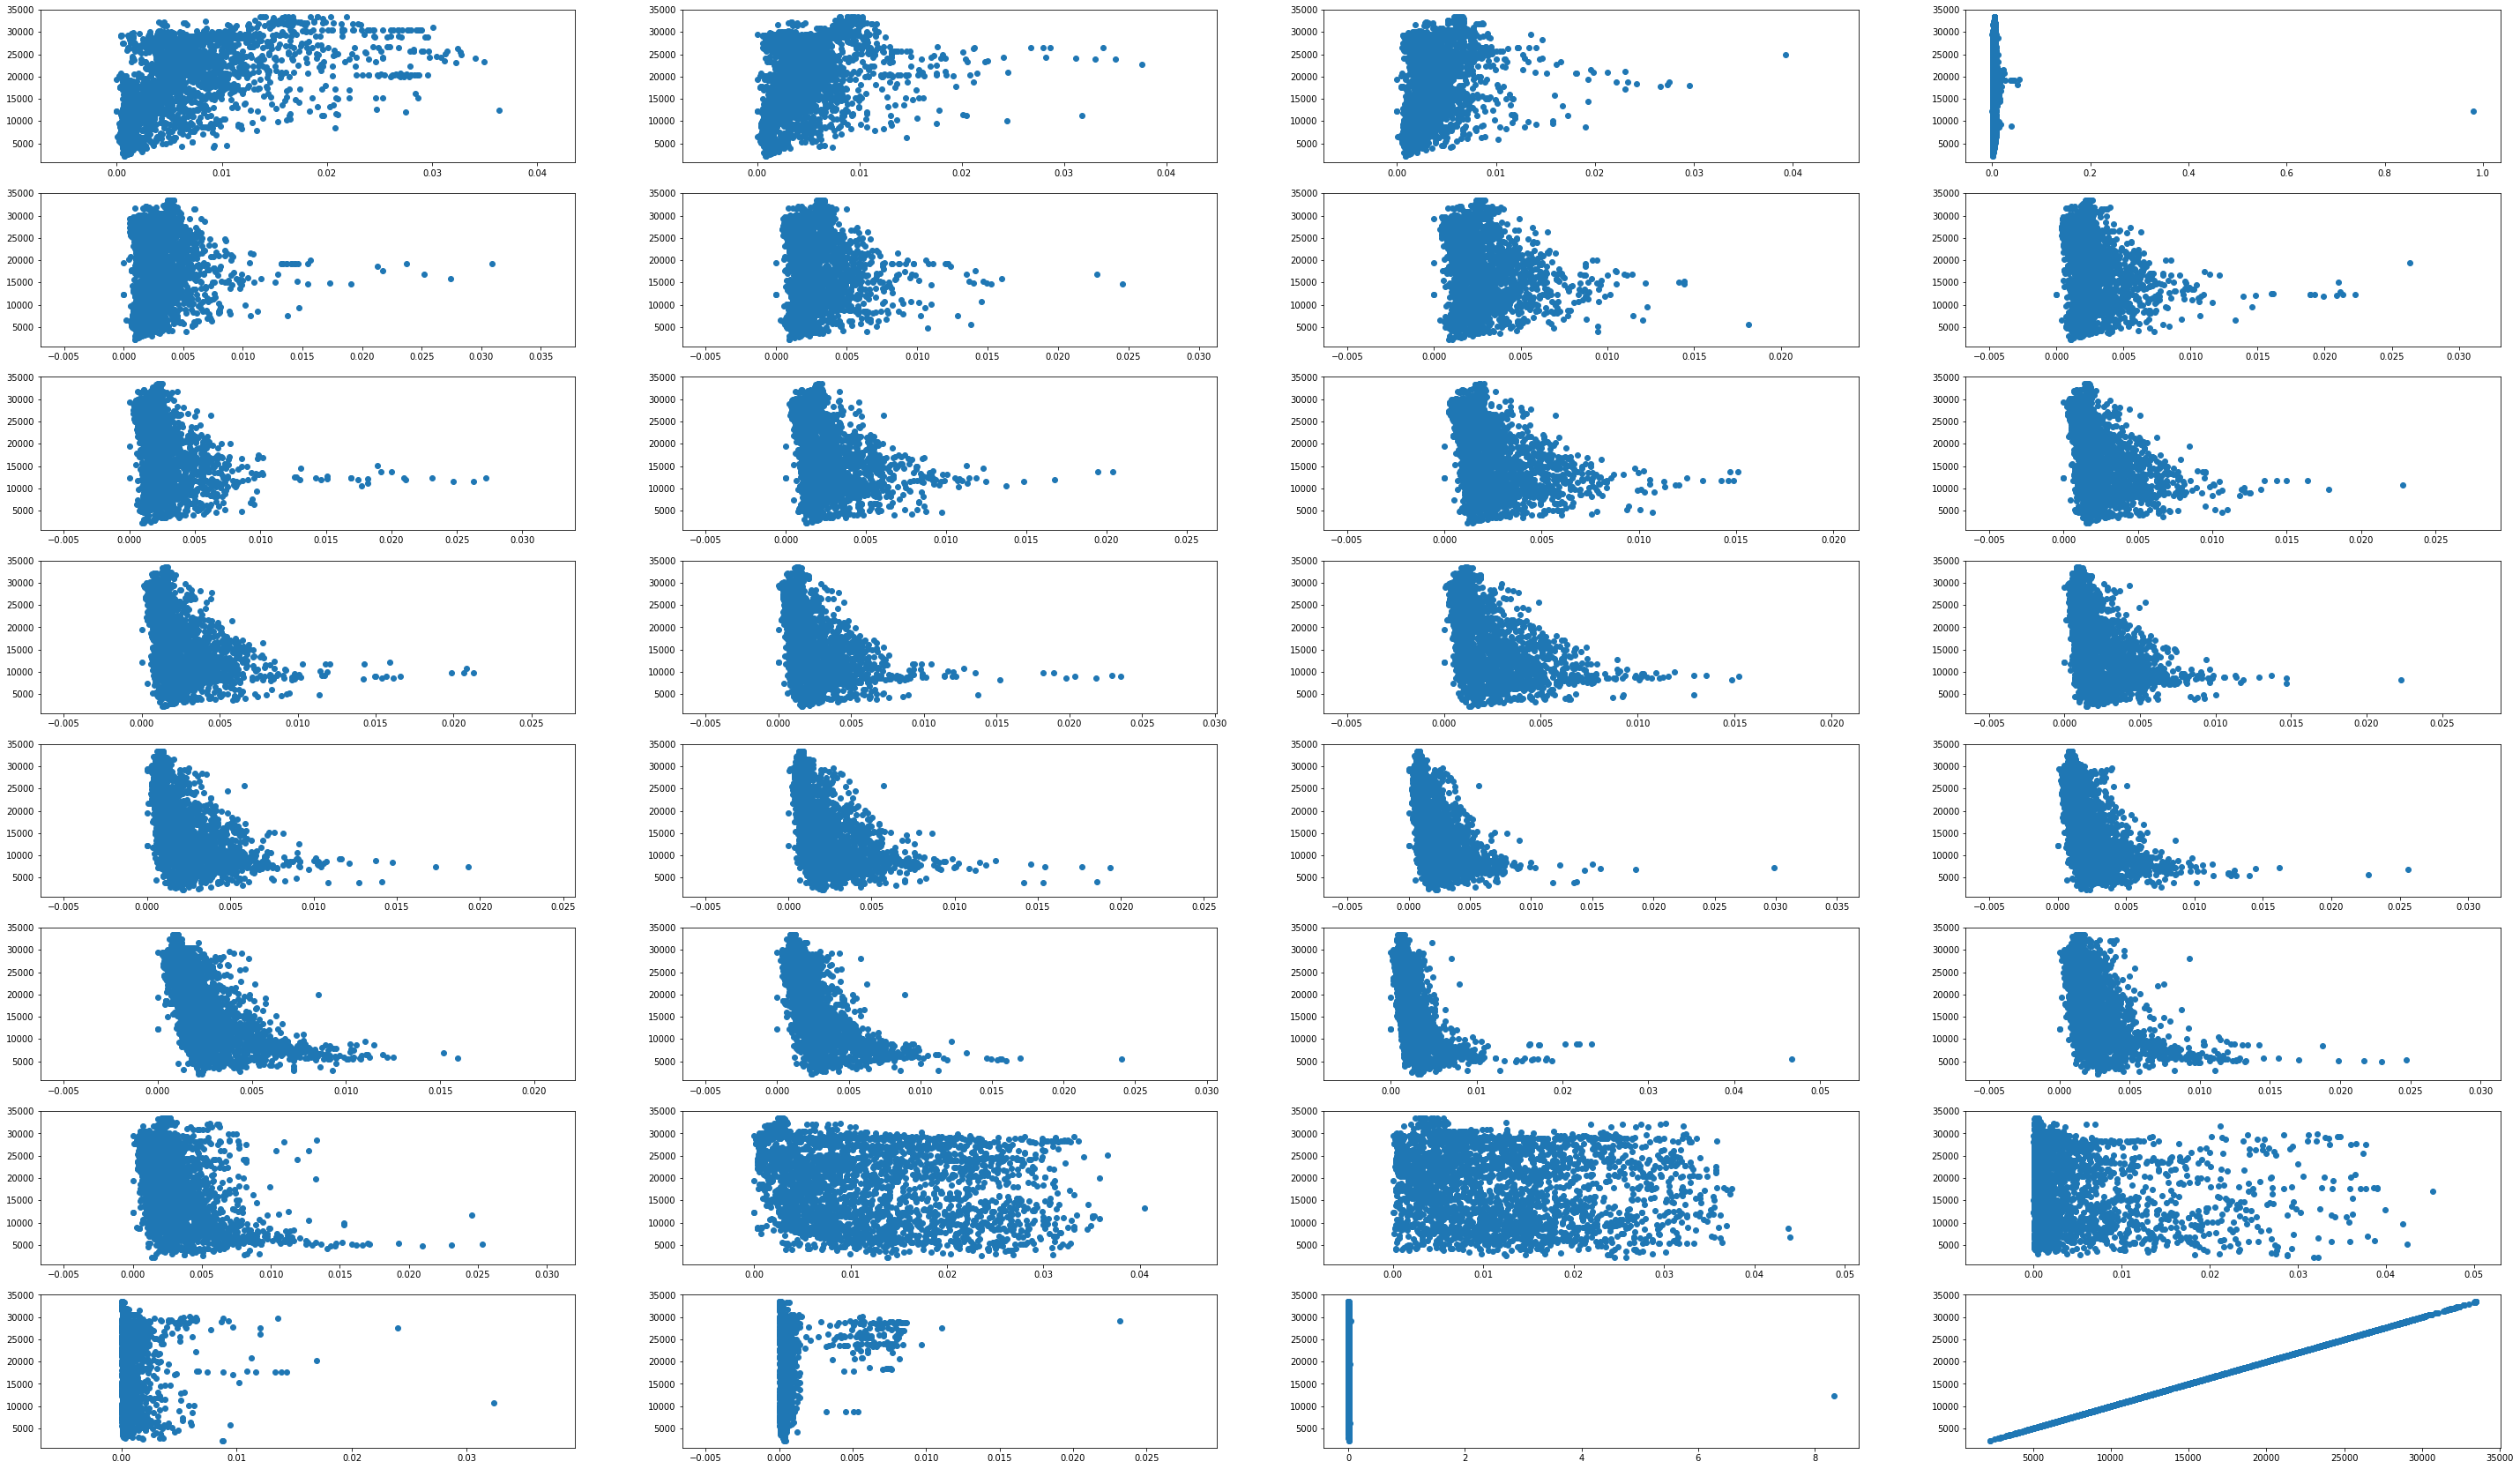

In [48]:
histograms32 = [np.histogram(np.asarray(image[0]), bins=32, density=True)[0] for image in images]
titulo32 = np.histogram(np.asarray(images[0][0]), bins=32, density=True)[1]
df32 = pd.DataFrame(histograms32)
df32.columns = titulo32[1:]
df32['peso'] = pesos

fig=plt.figure(figsize=(50, 30))
columns = 4
rows = 8

for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    x = df32[df32.columns[i]]
    y = df32['peso']
    plt.scatter(x, y)
plt.show()

In [78]:
def histogram_param(bins):
    histograms = [np.histogram(np.asarray(image[0]), bins=bins)[0] for image in images]
    titulo = np.histogram(np.asarray(images[0][0]), bins=bins)[1]
    df = pd.DataFrame(histograms)
    df.columns = titulo[1:]
    df['peso'] = pesos

    fig=plt.figure(figsize=(50, 30))
    columns = 4
    rows = bins // columns

    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        x = df[df.columns[i - 1]]
        y = df['peso']
        plt.scatter(x, y)
    plt.show()

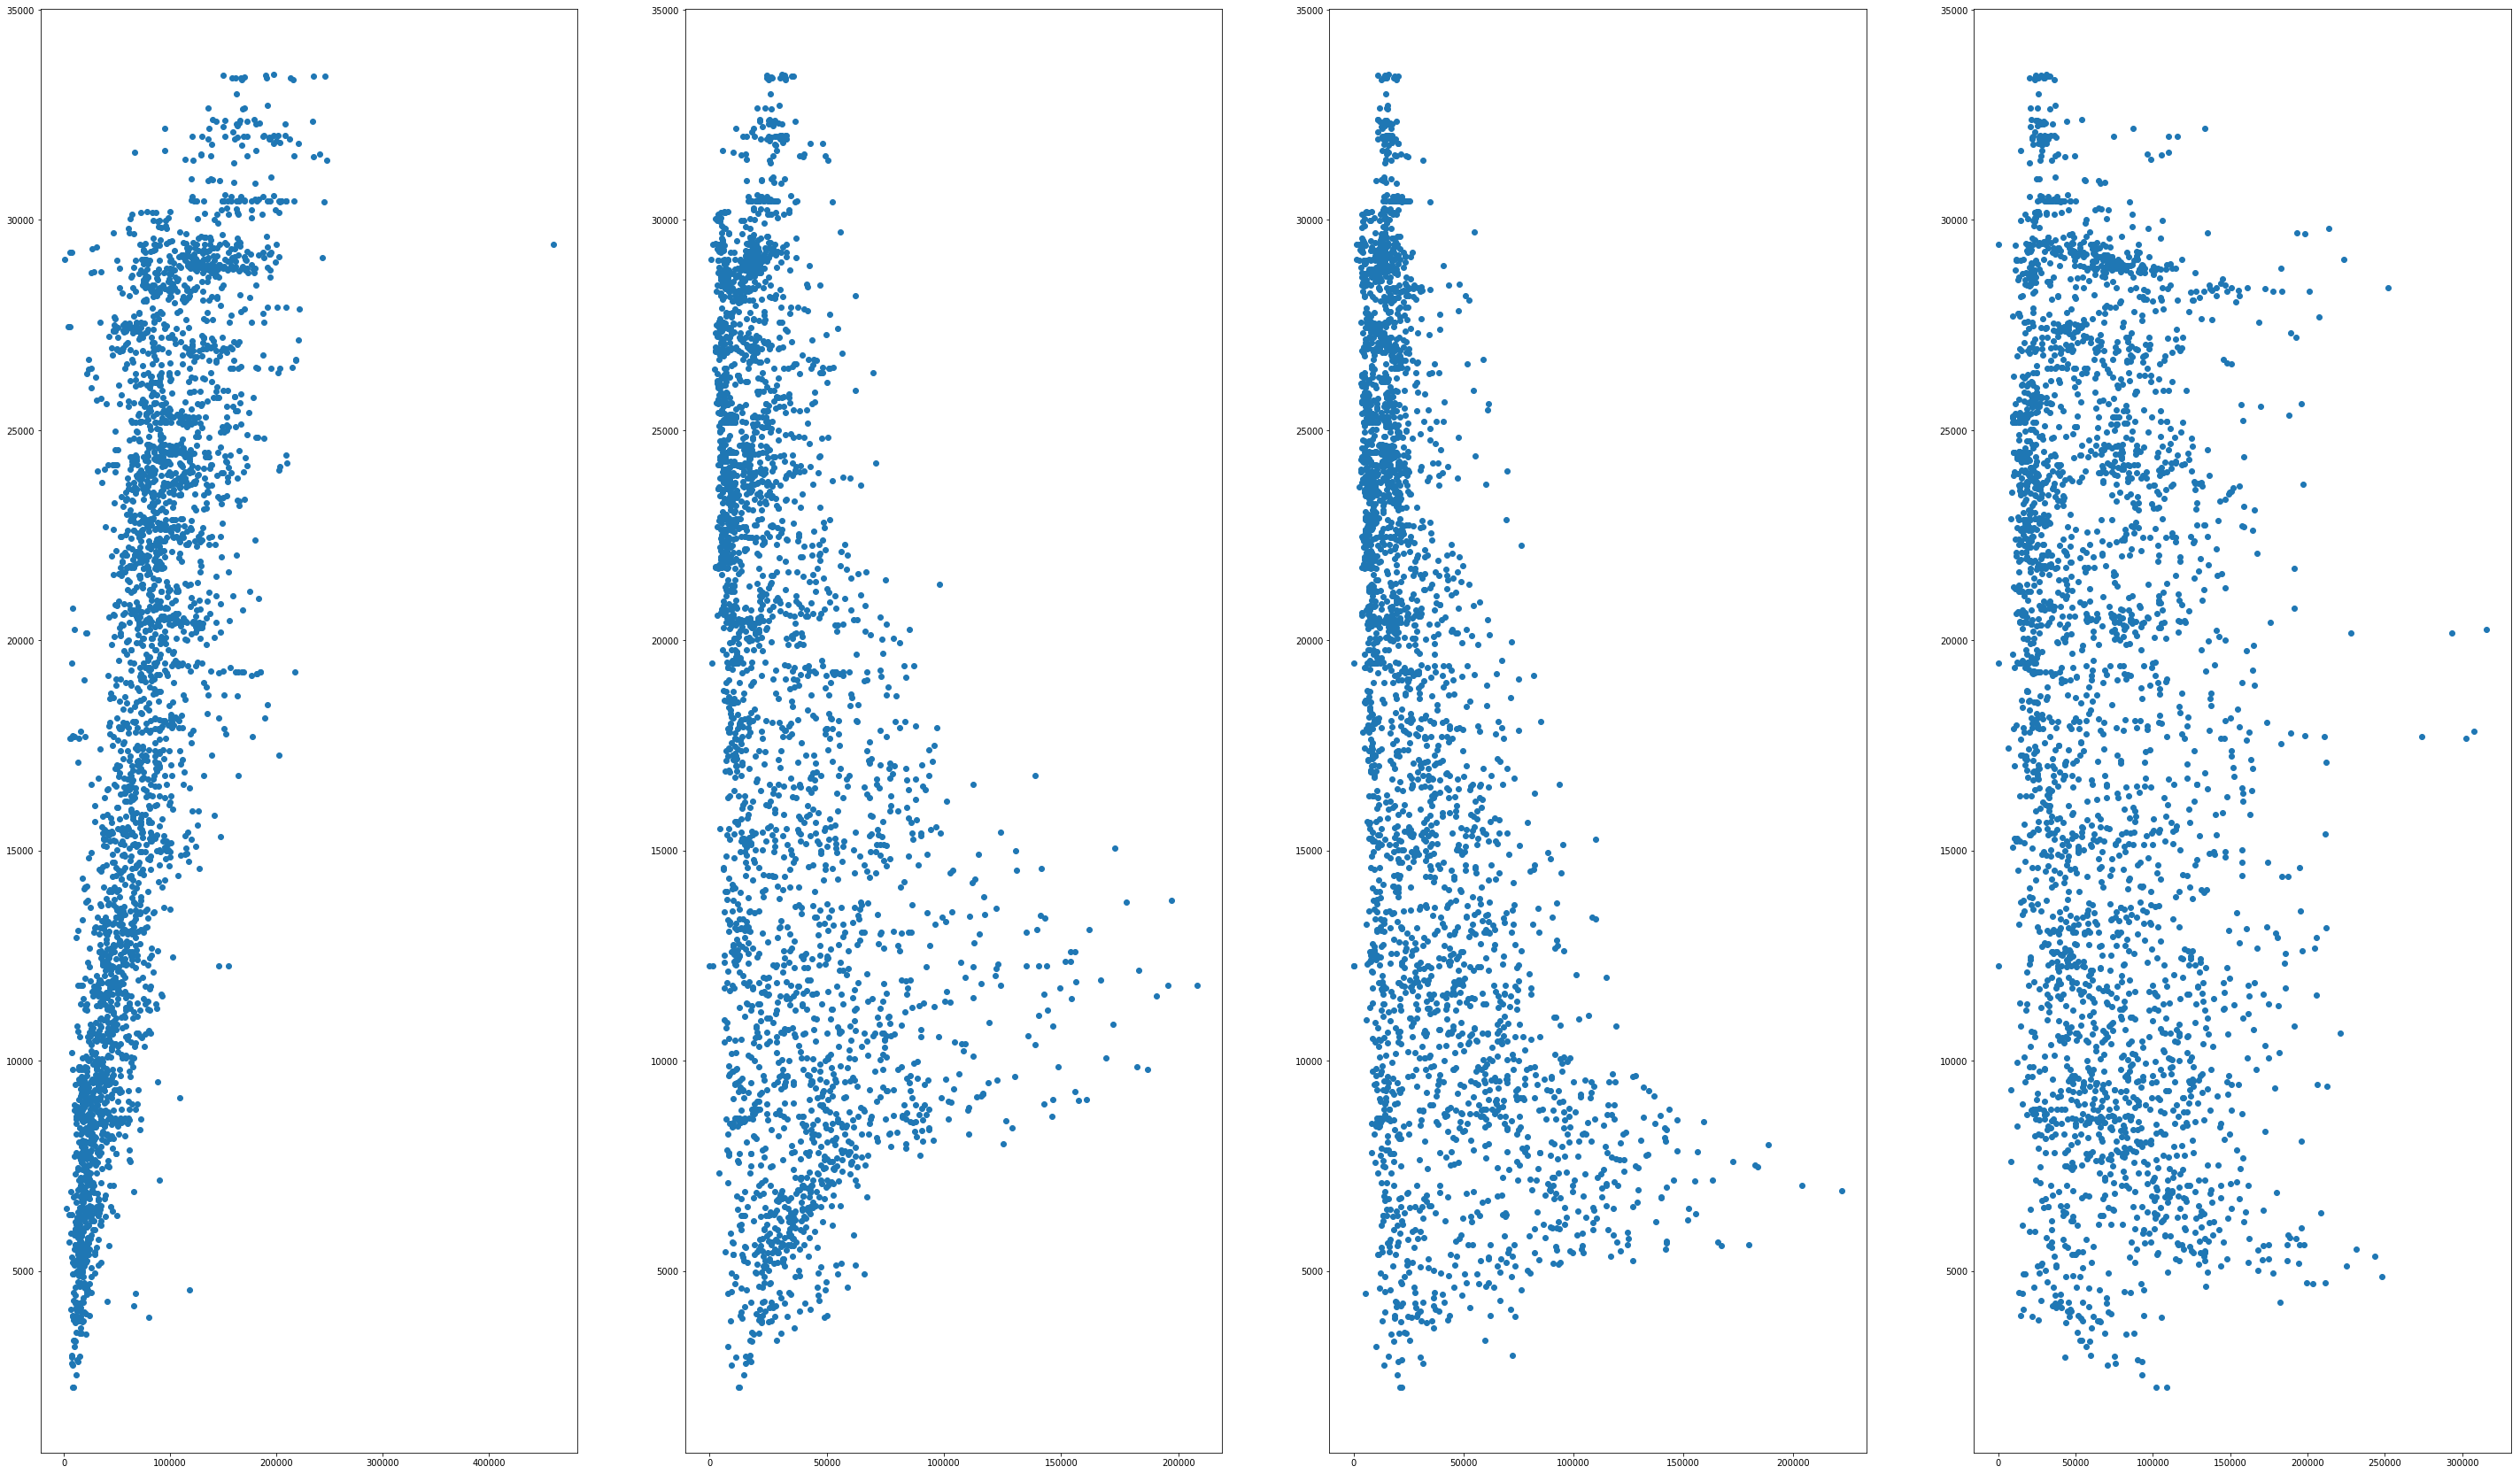

In [79]:
histogram_param(4)

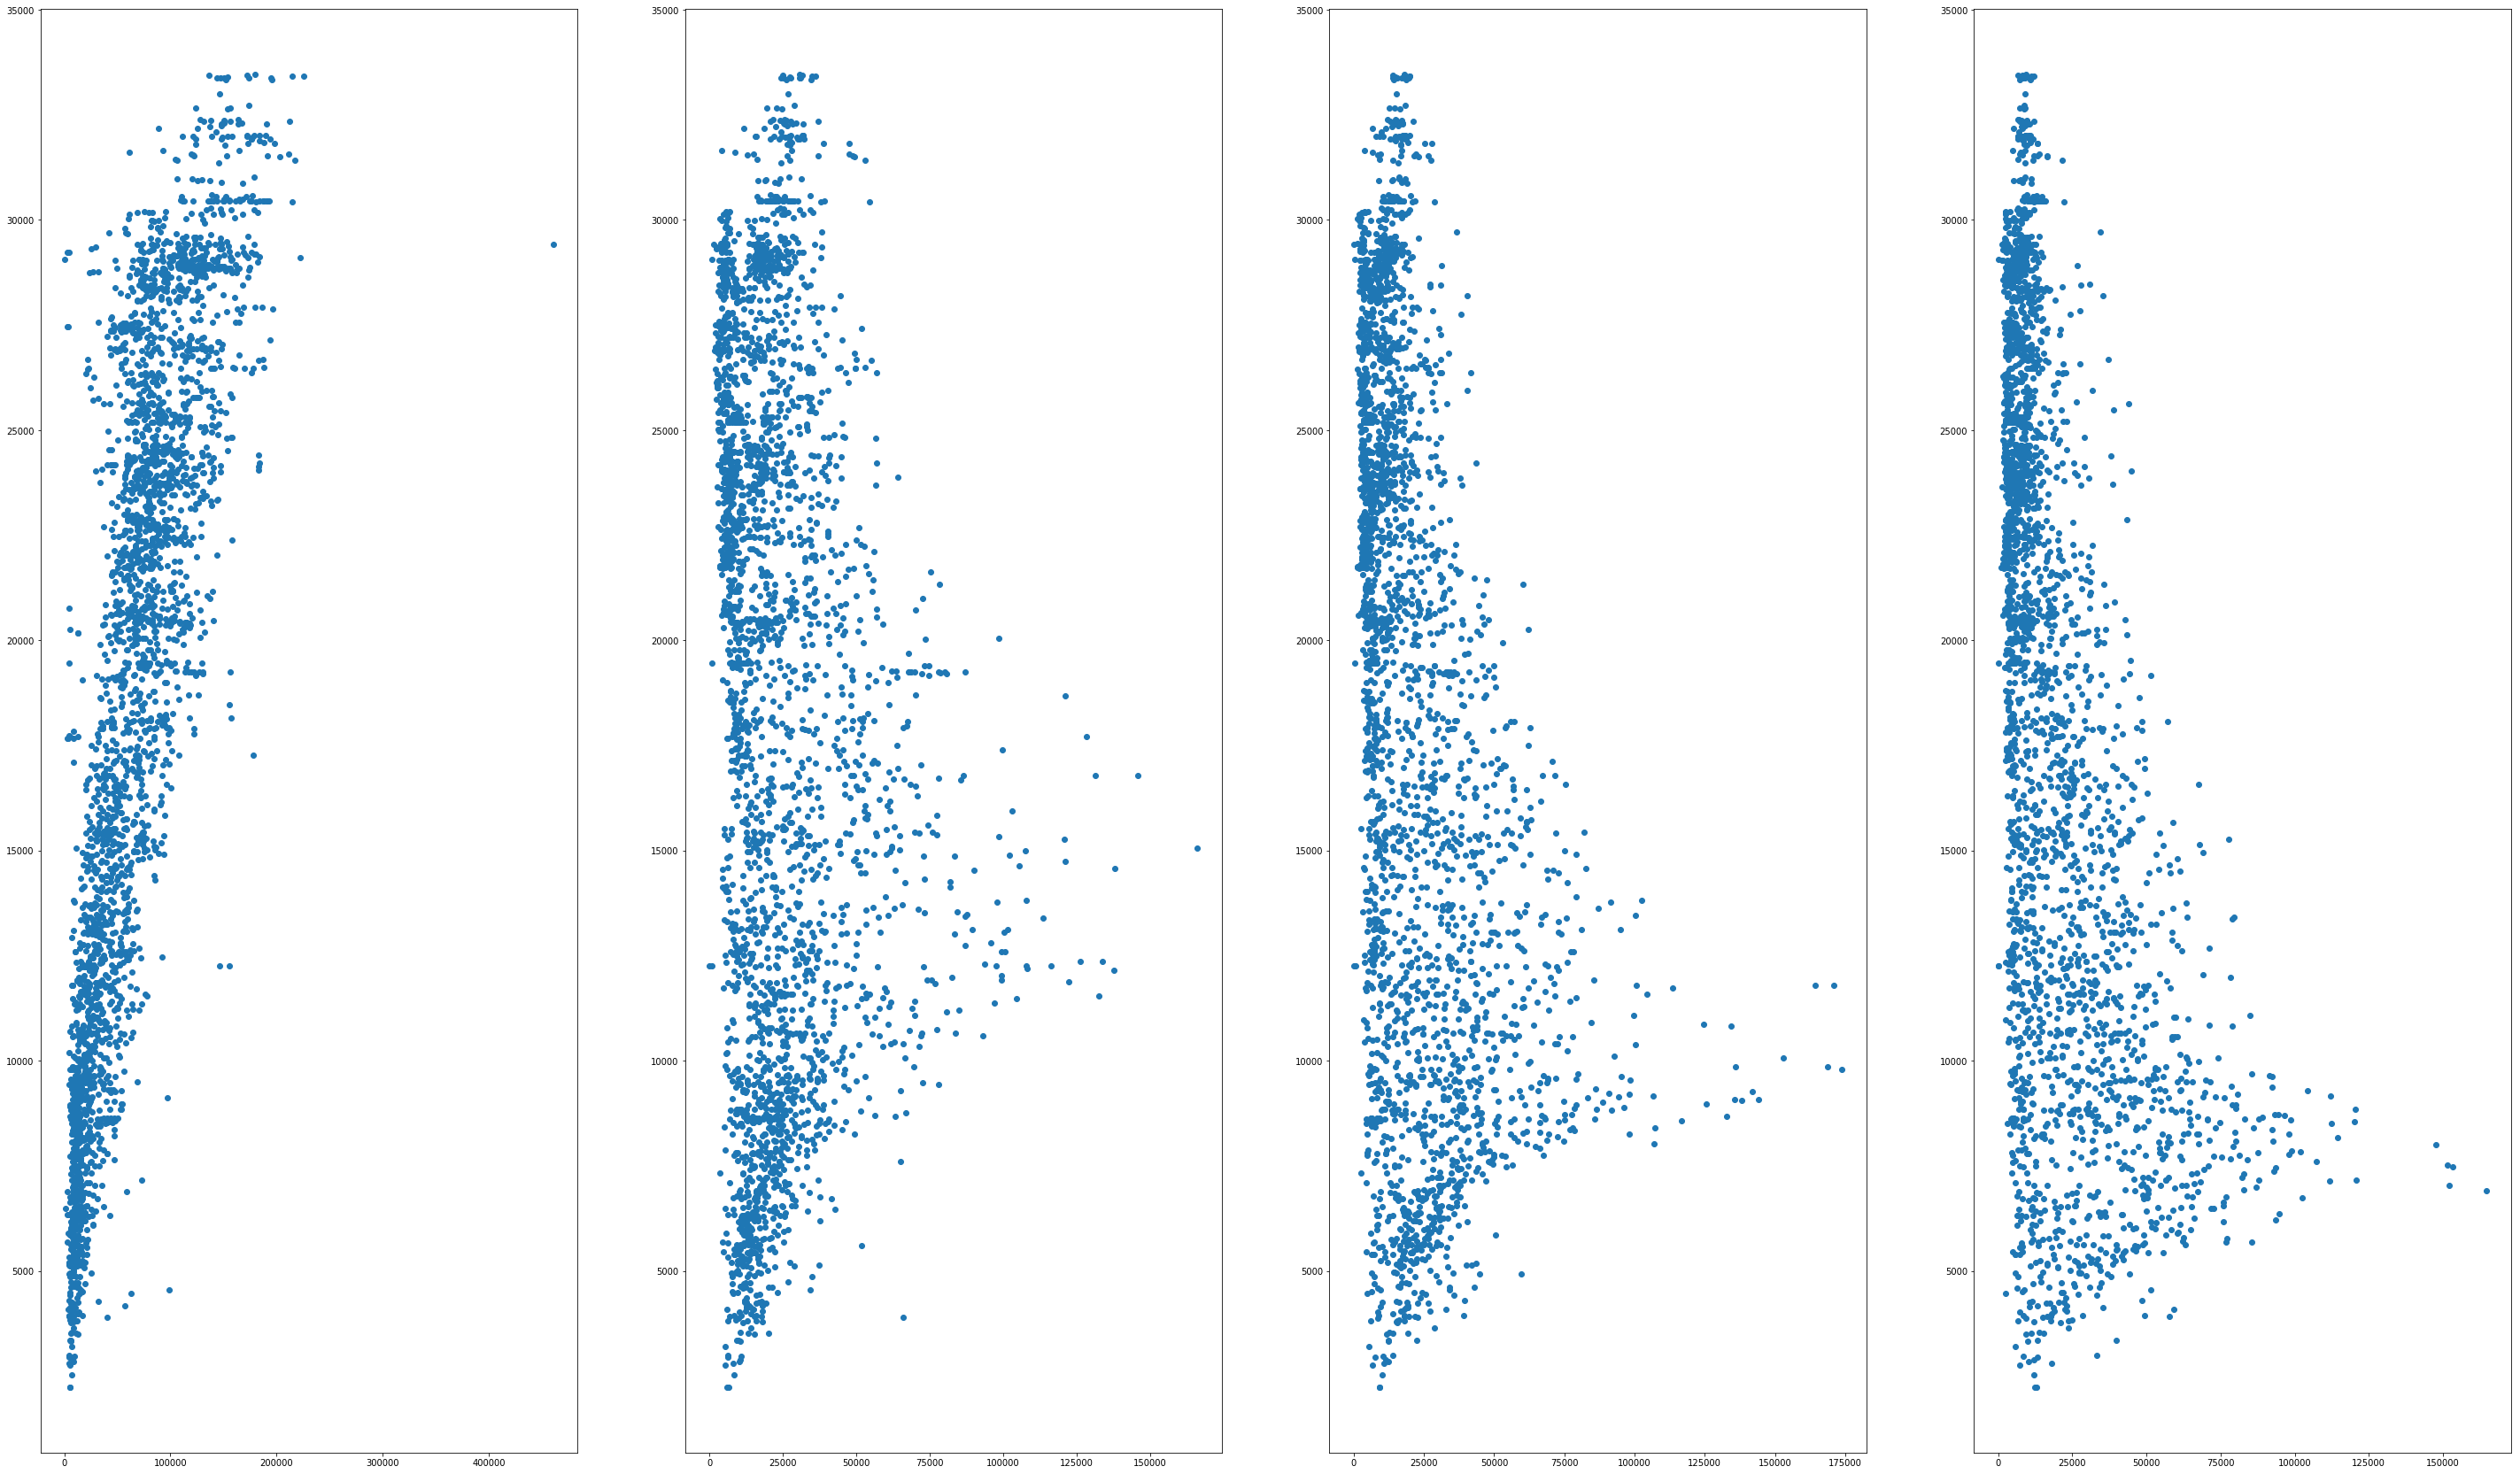

In [80]:
histogram_param(6)

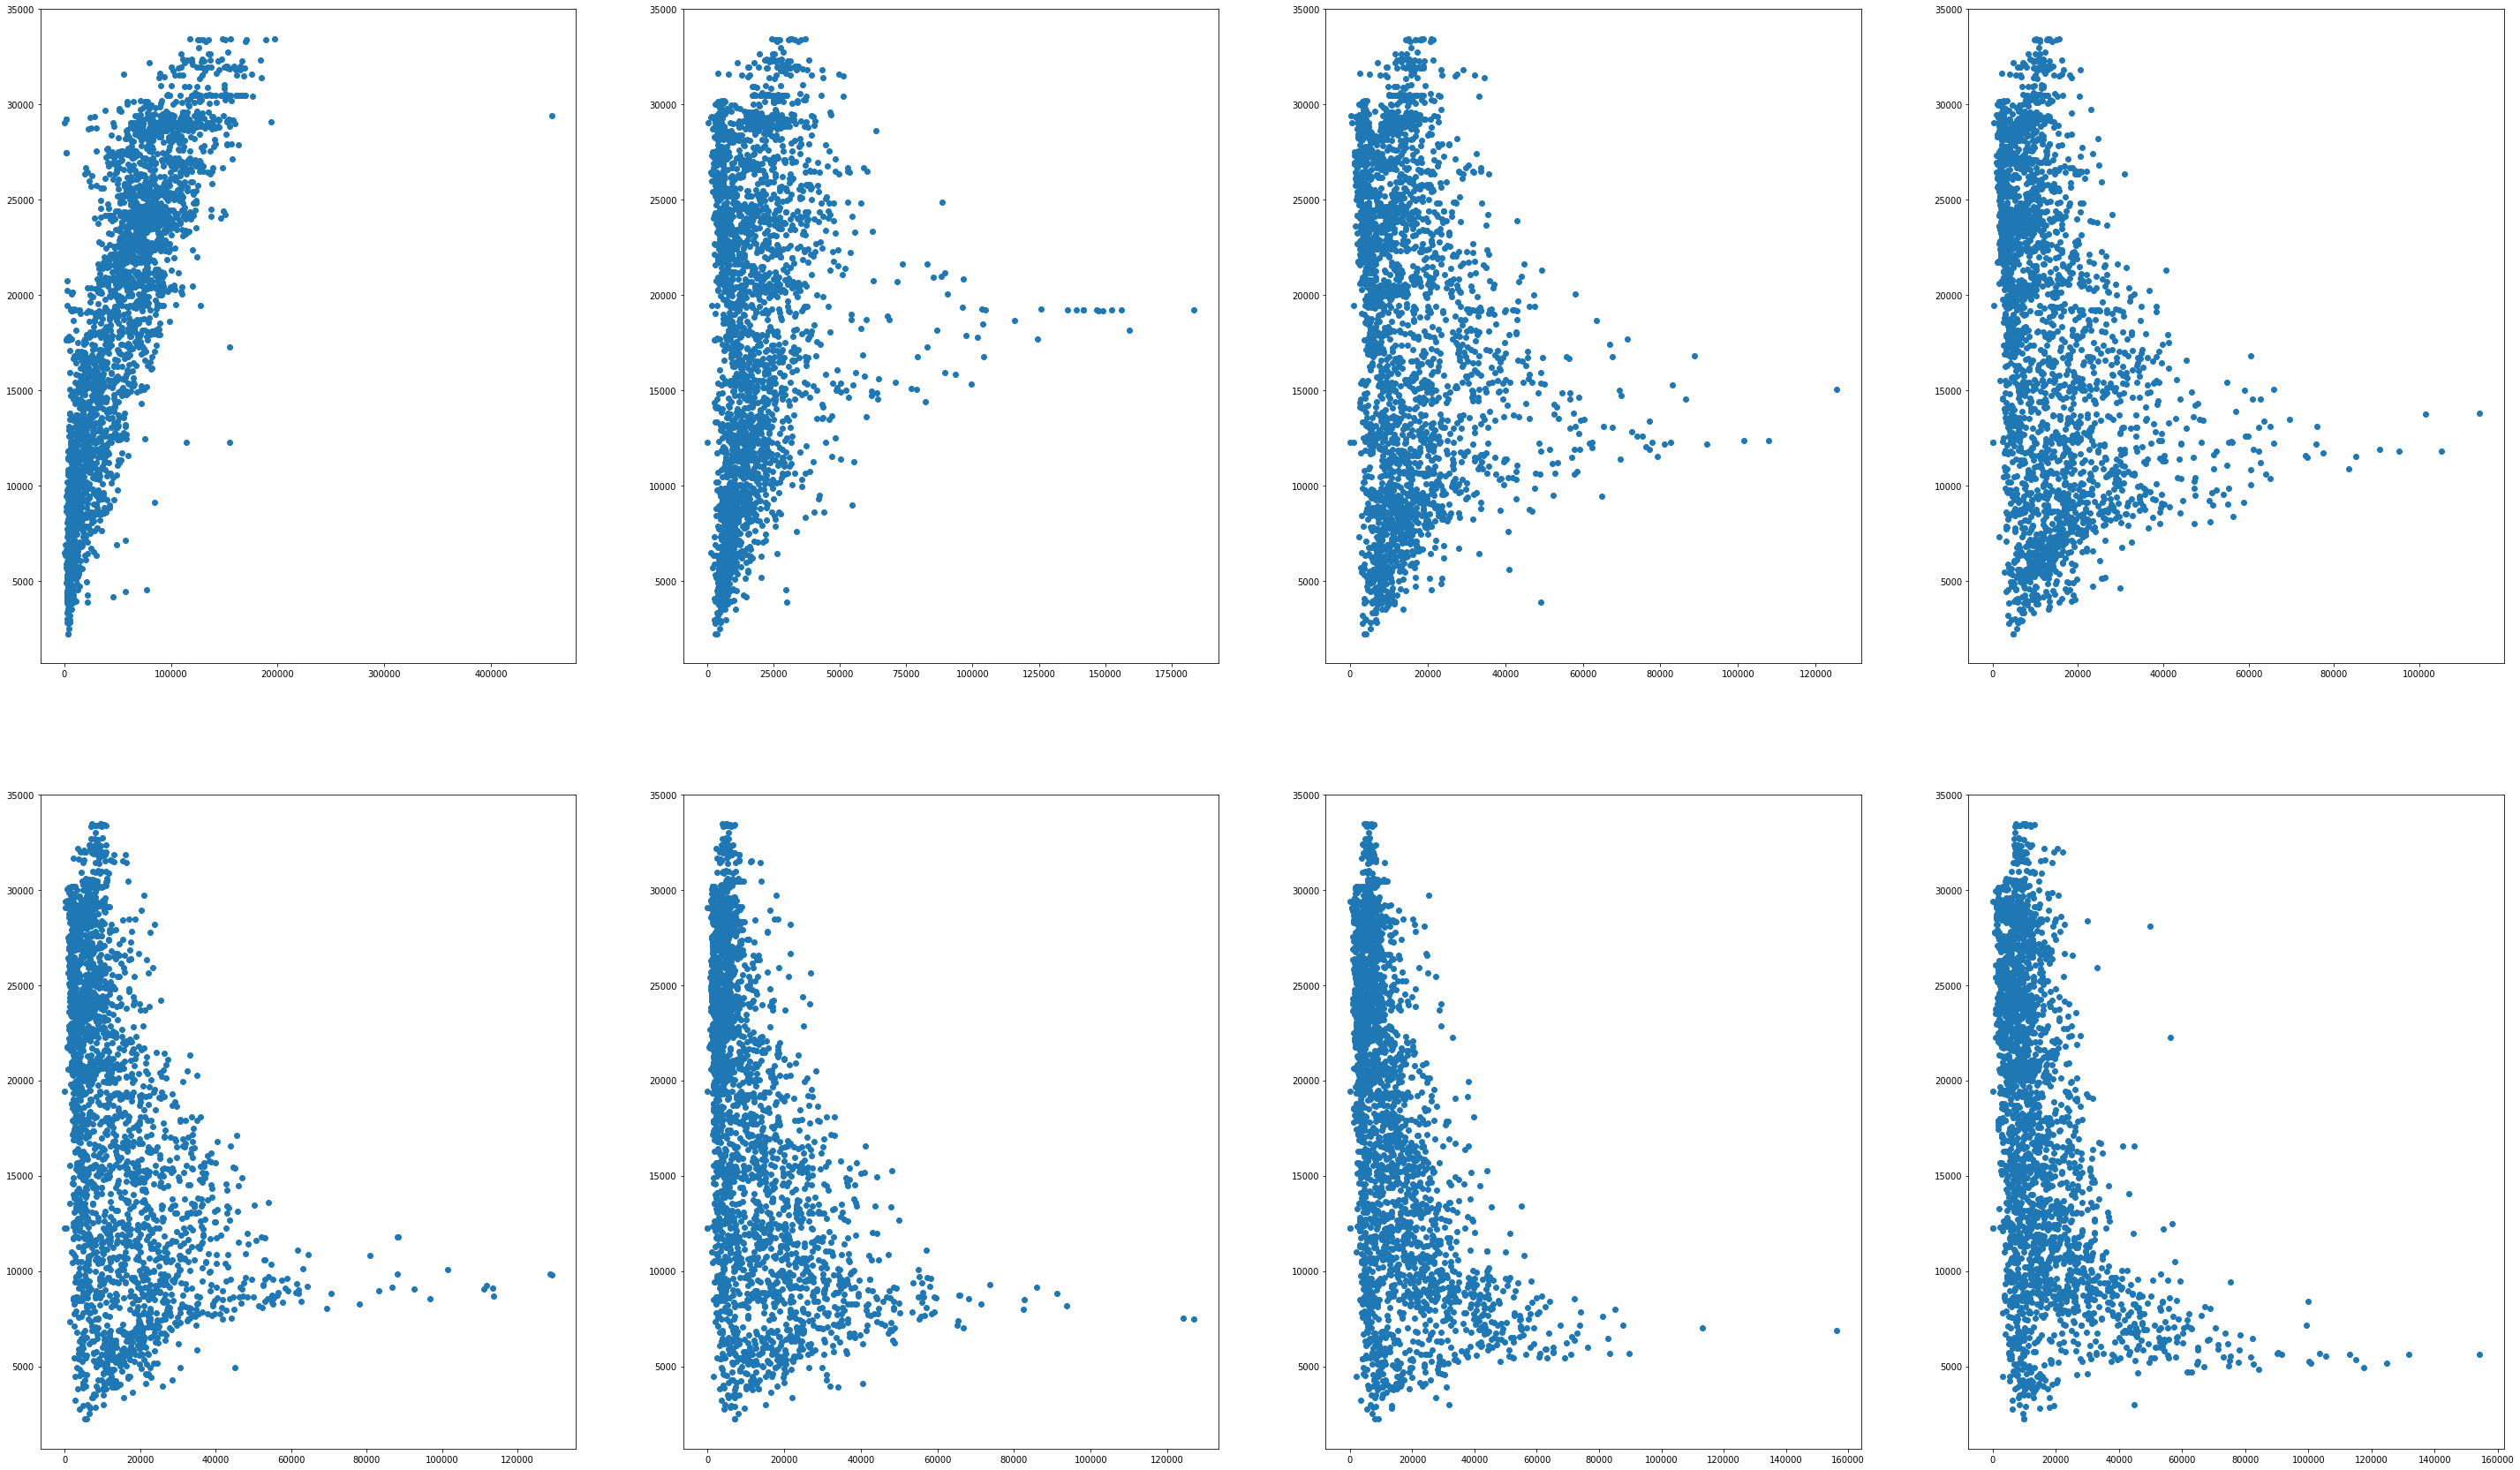

In [81]:
histogram_param(10)

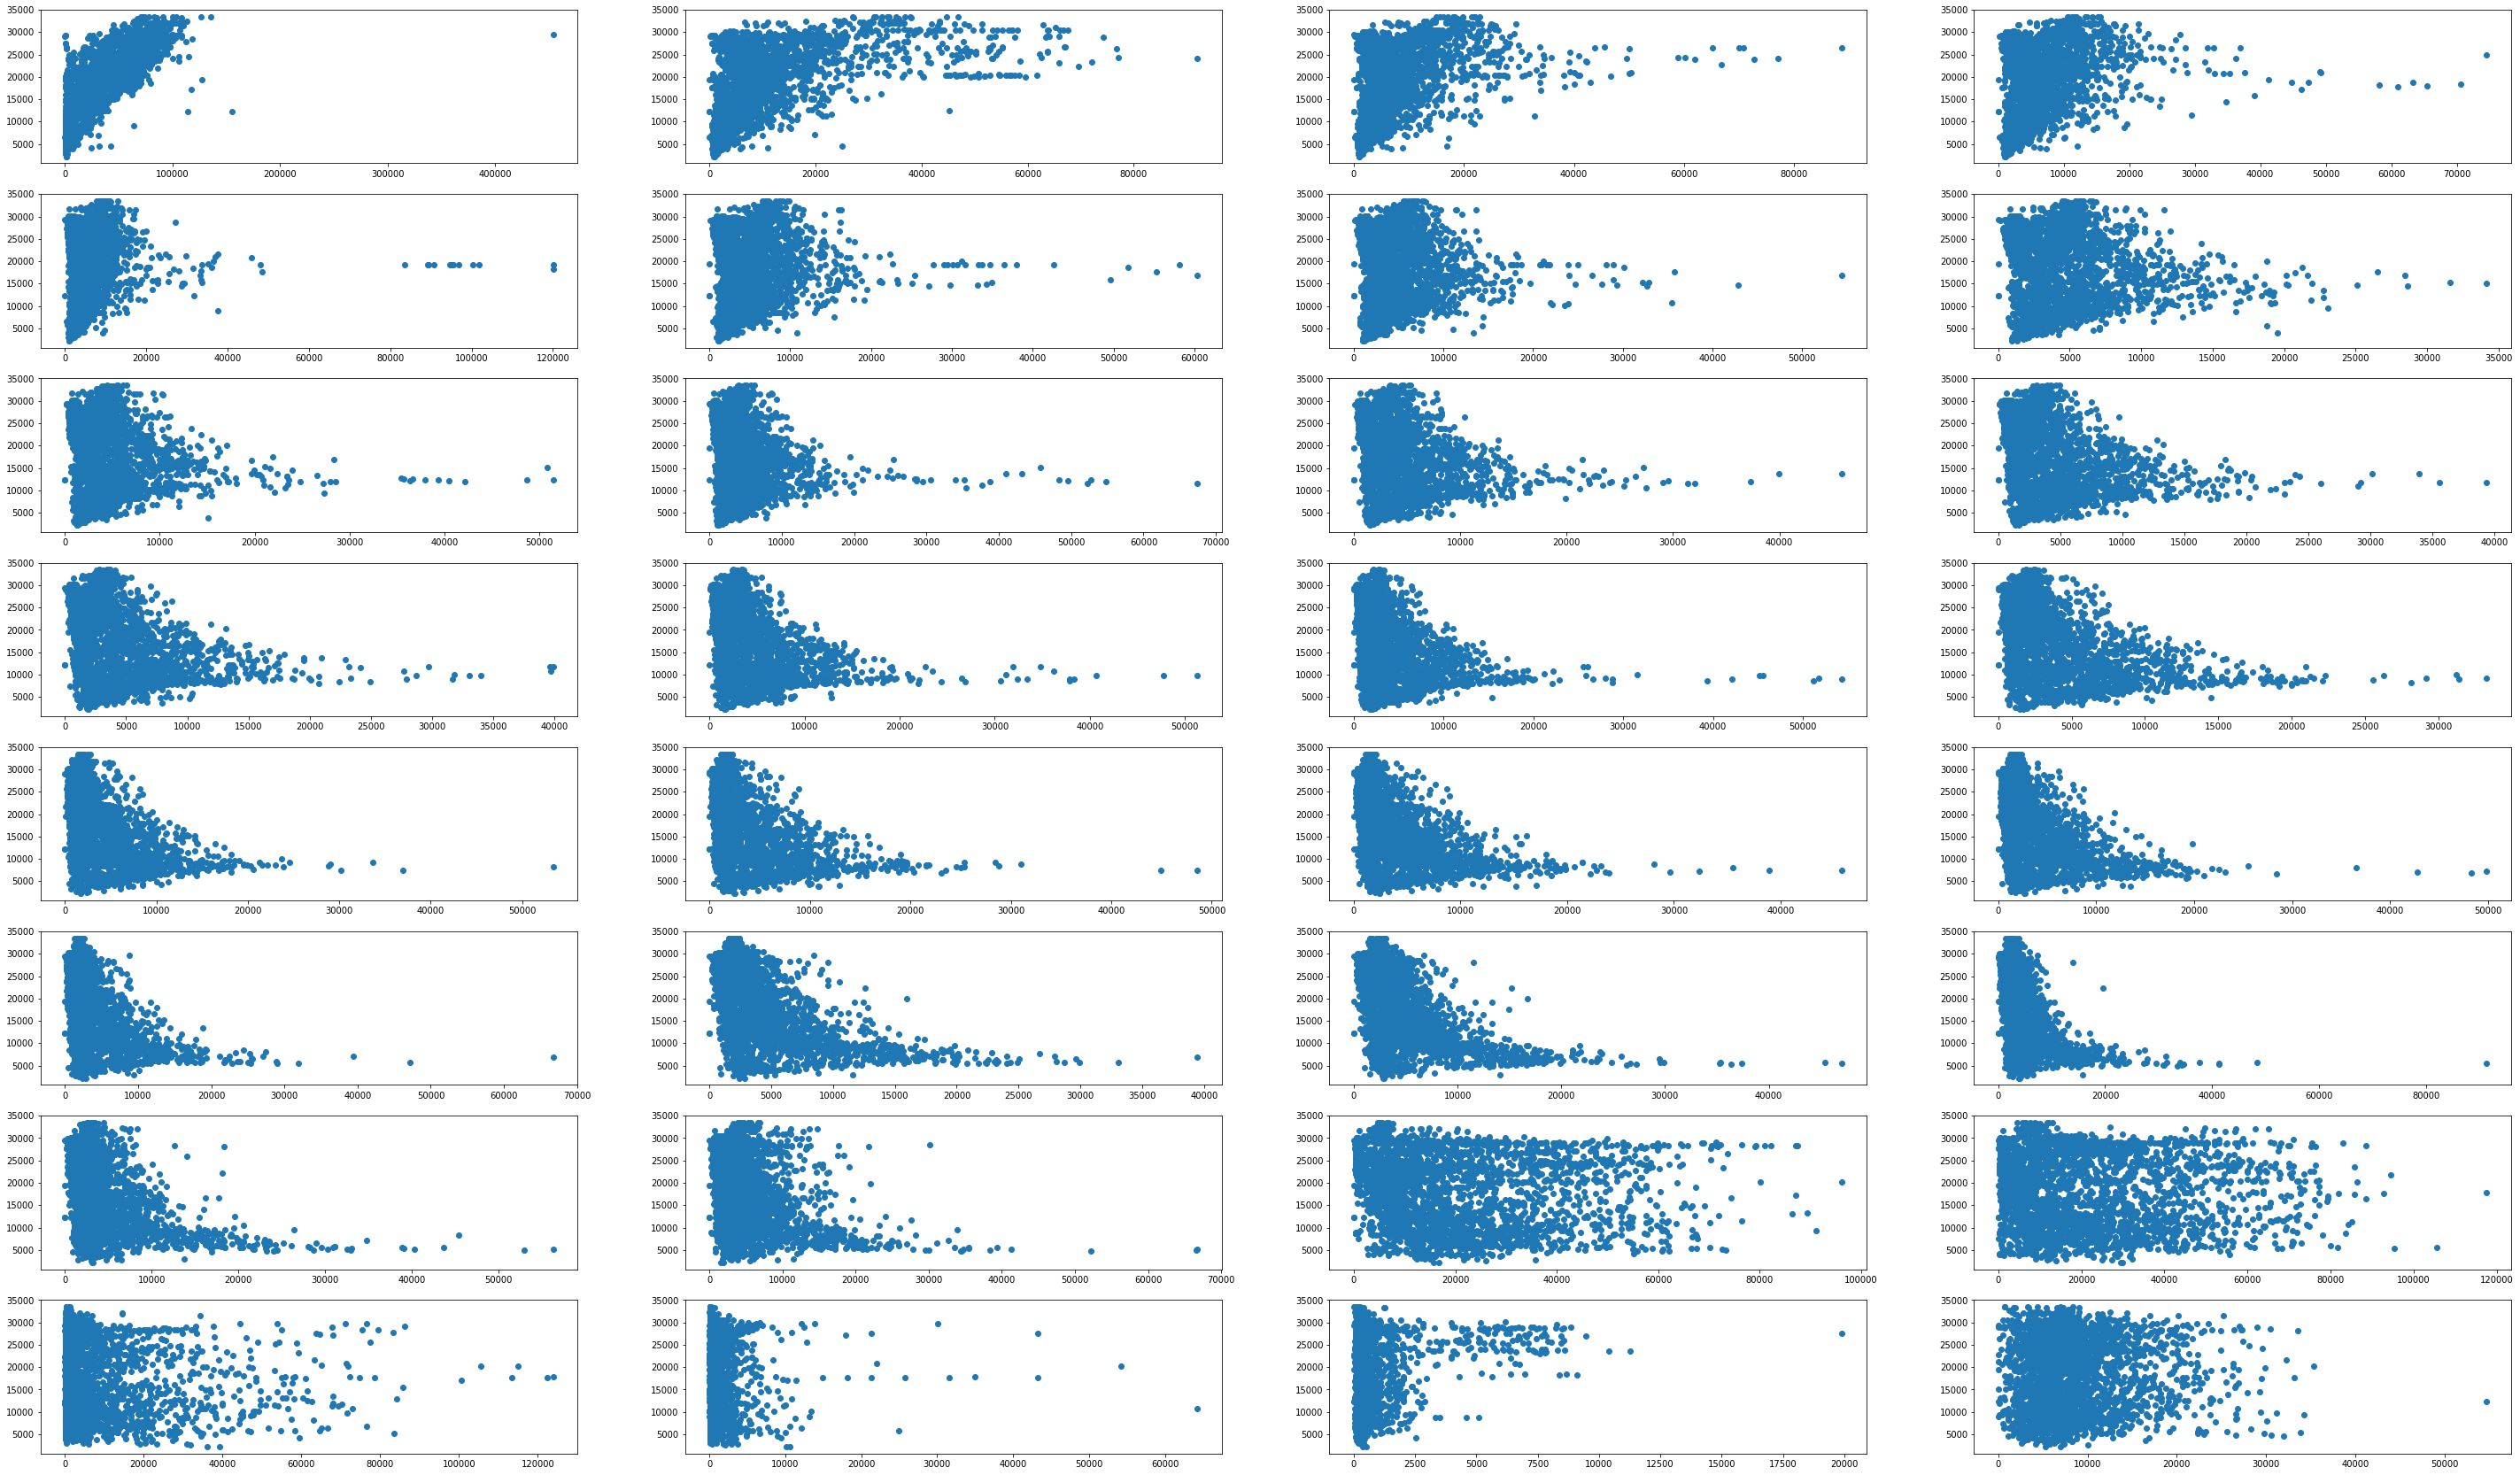

In [82]:
histogram_param(32)

In [146]:
from sklearn.decomposition import PCA

histograms = [np.histogram(np.asarray(image[0]), bins=42)[0] for image in images]
titulo = np.histogram(np.asarray(images[0][0]), bins=42)[1]

In [147]:
pca = PCA(n_components=4)
pca.fit(histograms)

print(pca.explained_variance_ratio_)  
print(pca.singular_values_)

[0.45573086 0.19348269 0.08414772 0.07273575]
[1716513.93585981 1118443.81852964  737588.78113947  685751.99634561]


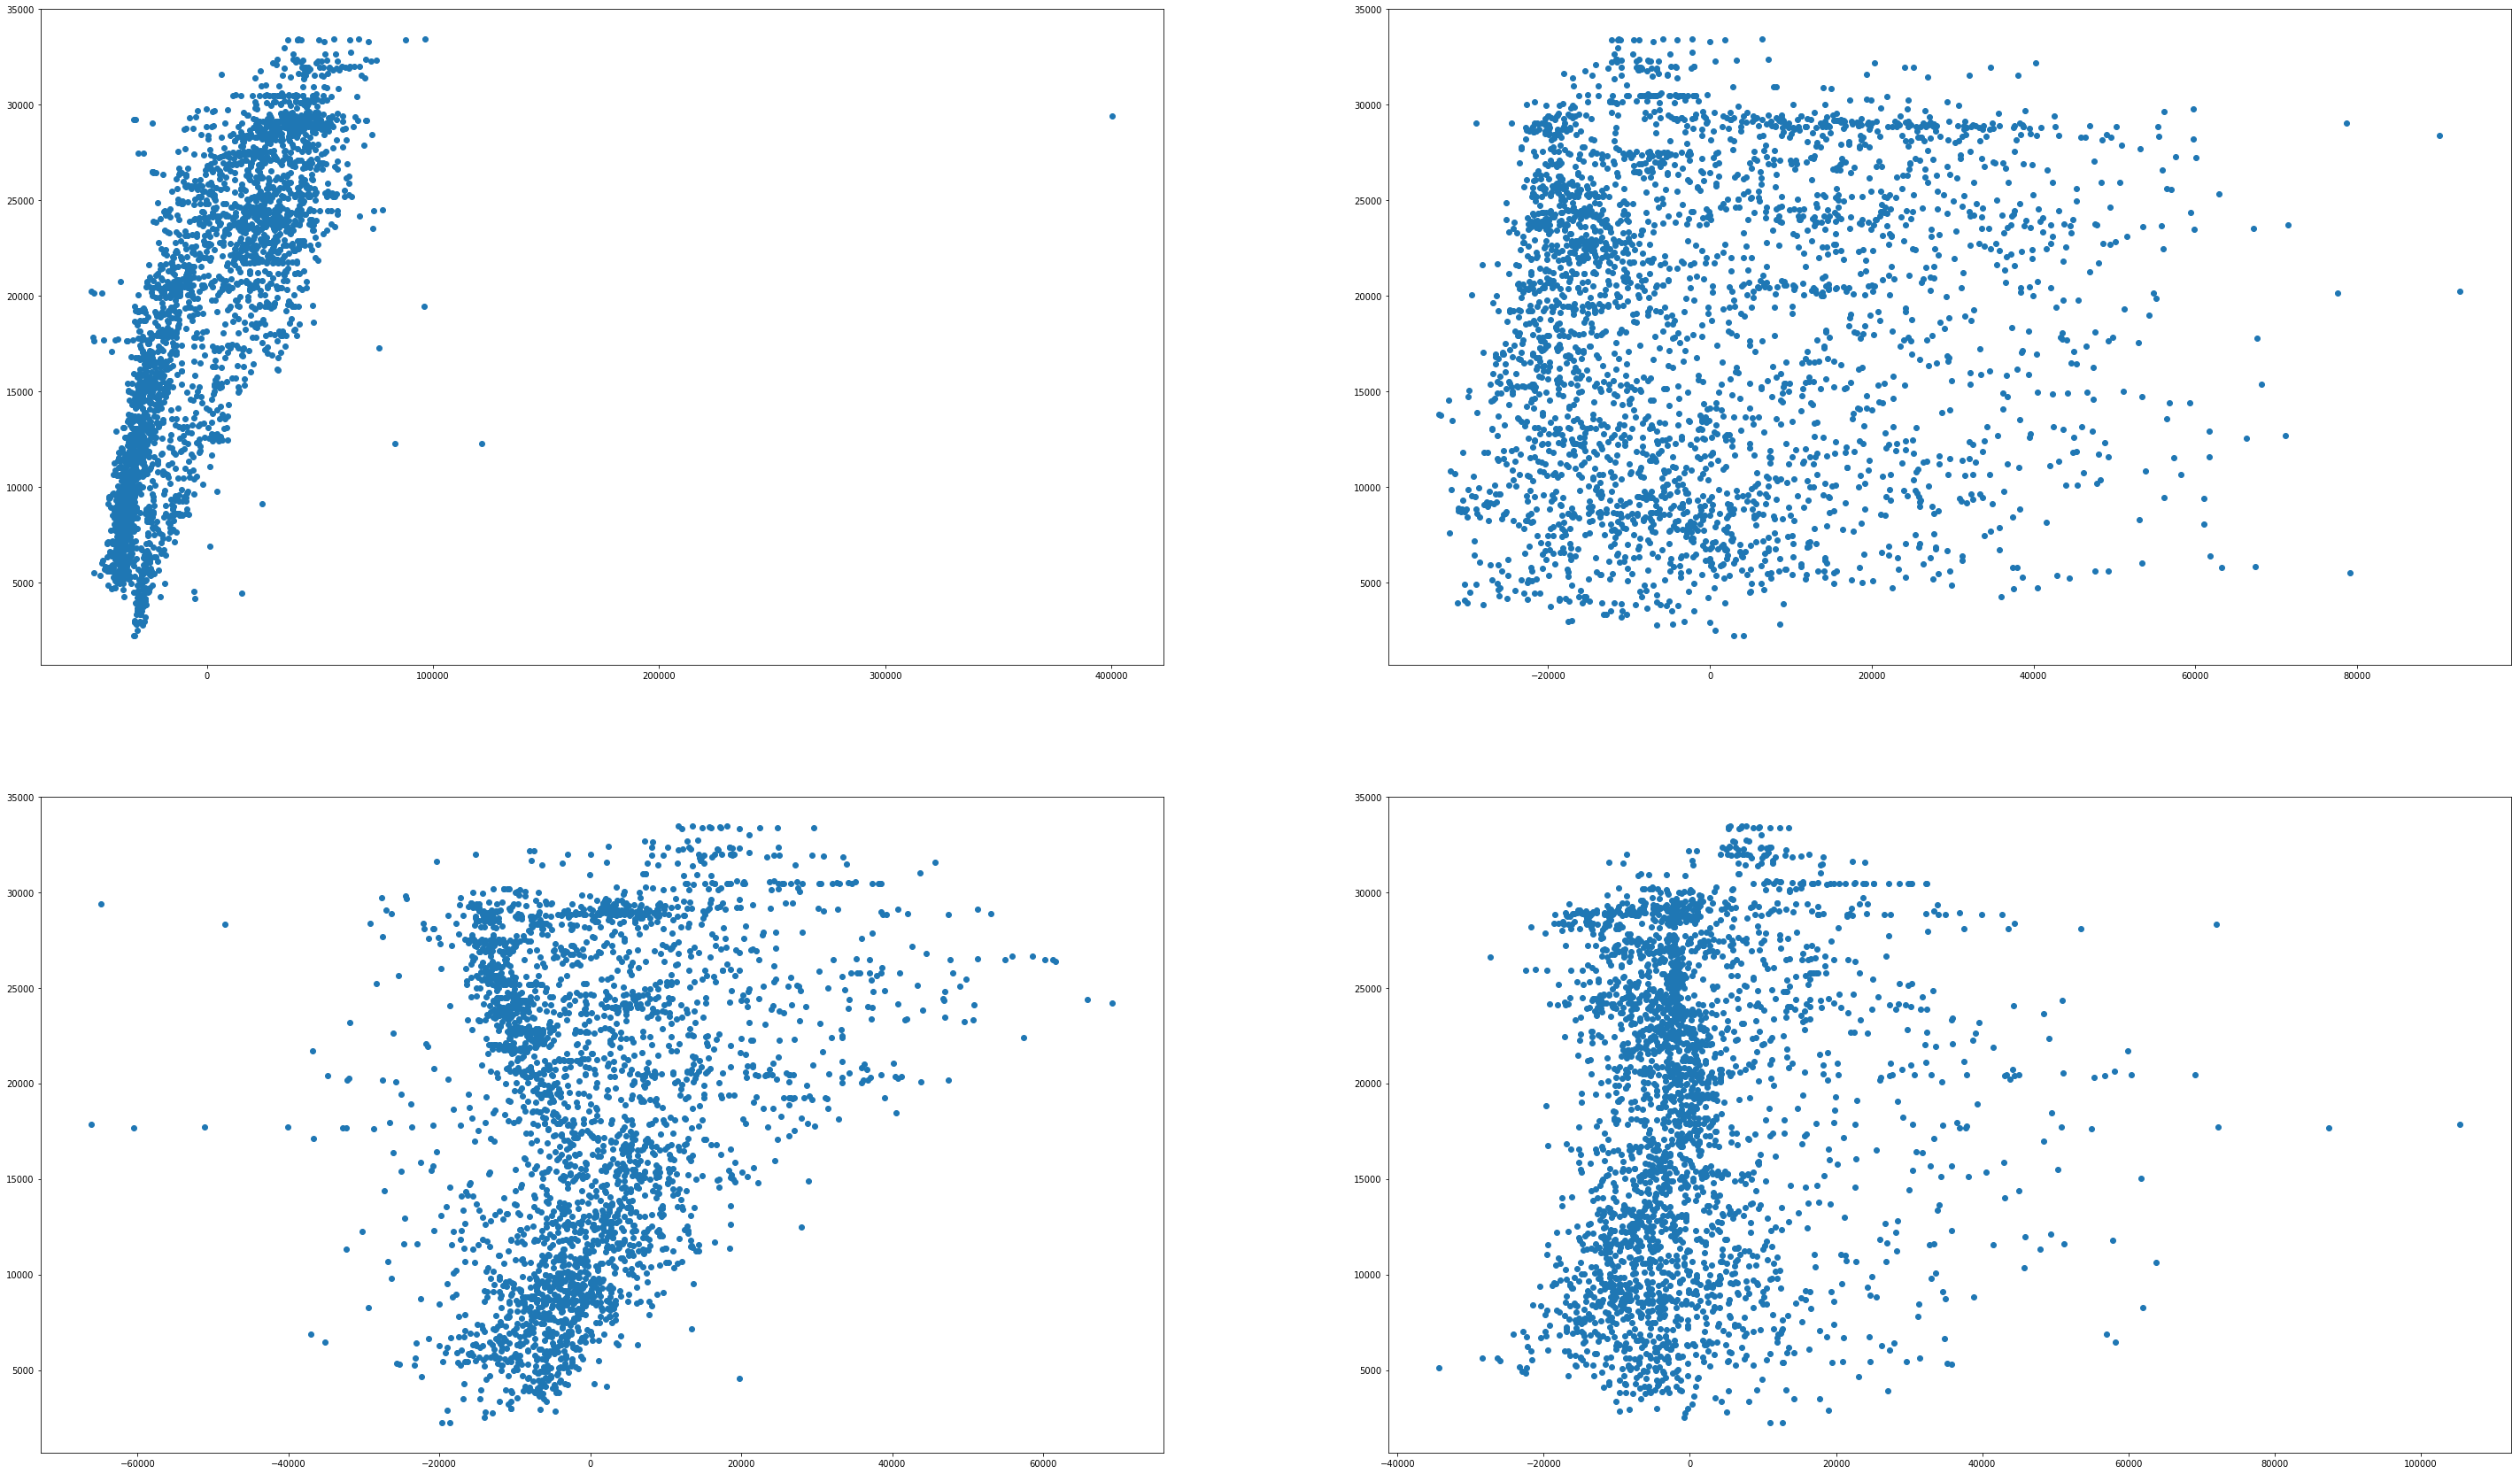

In [148]:
X = pca.transform(histograms)

dfpca = pd.DataFrame(X)
y = pesos

fig=plt.figure(figsize=(50, 30))
columns = 2

rows = 2
for i in range(1, 5):
    fig.add_subplot(rows, columns, i)
    x = dfpca[dfpca.columns[i - 1]]
    plt.scatter(x, y)
plt.show()

In [149]:
for i in range(4):
    print(i, np.corrcoef(dfpca[dfpca.columns[i]], y))

0 [[1.         0.80727596]
 [0.80727596 1.        ]]
1 [[1.         0.09045211]
 [0.09045211 1.        ]]
2 [[1.        0.2288693]
 [0.2288693 1.       ]]
3 [[1.         0.12189336]
 [0.12189336 1.        ]]


In [150]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, \
    mean_absolute_error, median_absolute_error 

def regression_plot(X, y):
    X_train = X[:-500]
    X_test = X[-500:]

    y_train = y[:-500]
    y_test = y[-500:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    print("Mean absolute error: %.2f"
          % mean_absolute_error(y_test, y_pred))
    print("Median absolute error: %.2f"
          % median_absolute_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

    # Plot outputs
    plt.scatter(y_test, y_test,  color='black')
    plt.scatter(y_test, y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

Coefficients: 
 [0.2010269  0.02647663 0.1396241  0.07987609]
Mean squared error: 23977517.25
Mean absolute error: 3848.96
Median absolute error: 3228.32
Variance score: 0.65


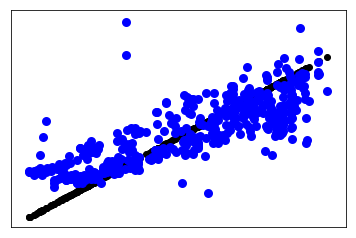

In [151]:
regression_plot(X, pesos)

Coefficients: 
 [    3134.96851272  -173206.33701592  -704164.0172505   -760533.95687081
  -648875.013825   -1488241.12420537  -708545.63918714]
Mean squared error: 38277362.96
Variance score: 0.44


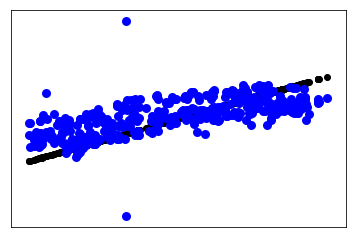

In [106]:
regression_plot(df[df.columns[0:7]], df['peso'])

Coefficients: 
 [ 2.51656637e+02  1.11361851e+05 -1.48285950e+05 -3.50073005e+05
 -3.55098877e+05 -1.60995211e+05 -5.59160091e+05 -2.28656396e+05
 -5.10316580e+05 -2.13727767e+05 -5.84827313e+05 -7.95778764e+05
 -5.02787589e+05 -2.41612472e+05 -3.61594975e+05]
Mean squared error: 40769692.90
Variance score: 0.40


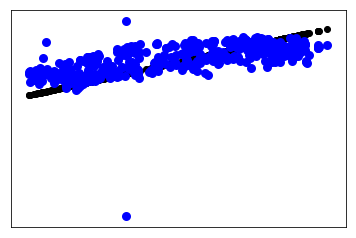

In [100]:
regression_plot(df16[df16.columns[0:15]], df16['peso'])

Coefficients: 
 [    2775.29902311   150684.889741    -149867.03216587   101443.71976505
  -155392.70350587   190534.72929146  -621416.19846616   150345.10276592
  -225611.4684672    -10674.56967144  -657006.61518694   744714.14057628
 -1072813.35272918   539031.91945869  -787663.75644314   213300.51365964
  -355299.81374475   337981.94969796 -1276776.03252585   663345.31988585
   -81538.8130176   -973958.27473544    12894.68060612  -539131.87627903
   -85184.07808861  -303030.7225413   -166196.86671752   -56147.53395599
  -224880.35308535    39093.37217994  -263647.08623707]
Mean squared error: 74222718.45
Variance score: -0.09


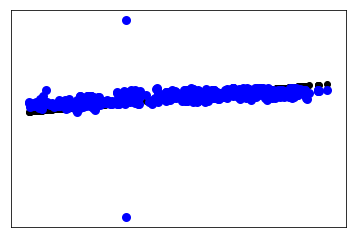

In [101]:
regression_plot(df32[df32.columns[0:31]], df32['peso'])

In [174]:
X = [np.asarray(image[0]).sum() for image in images]
np.corrcoef(X, y)

array([[ 1.        , -0.45375061],
       [-0.45375061,  1.        ]])

In [179]:
X = np.array(X)
X = X[:, np.newaxis]
X

array([[39495645],
       [27030156],
       [22050180],
       ...,
       [12337248],
       [ 6156972],
       [19327545]], dtype=uint64)

Coefficients: 
 [-0.00029308]
Mean squared error: 67007743.02
Mean absolute error: 6711.77
Median absolute error: 5749.65
Variance score: 0.01


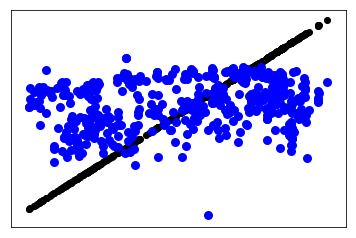

In [180]:
regression_plot(X, y)

In [167]:
df_combinado = df_pca


array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [43]:
# Função para testar histograma de vários bins.
# Reduzir para ir mais rápido

def make_df(bins, max_images):
    histo = [np.histogram(np.asarray(image[0]), bins=bins)[0] for image in images[:max_images]]
    titulo = np.histogram(np.asarray(images[0][0]), bins=bins)[1]
    df = pd.DataFrame(histo)
    df.columns = titulo[1:]
    df['peso'] = pesos[:max_images]
    df.hist()

    columns = 4
    rows = bins // 4
    fig=plt.figure(figsize=(12, 3 * rows))
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        x = df[df.columns[i-1]]
        y = df['peso']
        plt.scatter(x, y)
    plt.show()

    for i in range(bins):
        print(i, np.corrcoef(df[df.columns[i]], df['peso']))

    return df
    
    


In [ ]:
for i in range(4, 32, 4):
    make_df(i, 500)


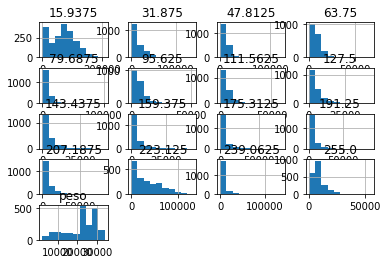

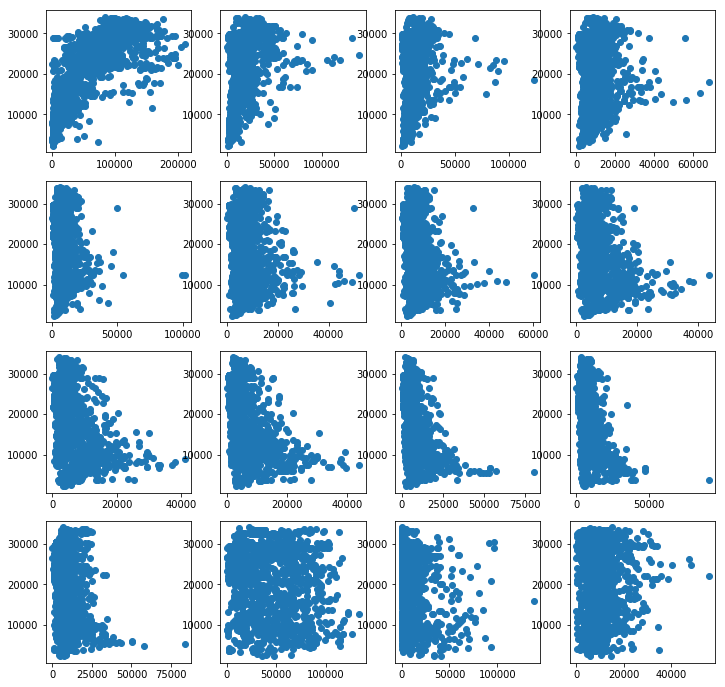

0 [[1.        0.7513899]
 [0.7513899 1.       ]]
1 [[1.         0.32959175]
 [0.32959175 1.        ]]
2 [[1.         0.13948793]
 [0.13948793 1.        ]]
3 [[ 1.         -0.01787509]
 [-0.01787509  1.        ]]
4 [[ 1.         -0.17465852]
 [-0.17465852  1.        ]]
5 [[ 1.         -0.27989067]
 [-0.27989067  1.        ]]
6 [[ 1.         -0.36945961]
 [-0.36945961  1.        ]]
7 [[ 1.         -0.44420439]
 [-0.44420439  1.        ]]
8 [[ 1.        -0.5102164]
 [-0.5102164  1.       ]]
9 [[ 1.         -0.54589465]
 [-0.54589465  1.        ]]
10 [[ 1.         -0.52356894]
 [-0.52356894  1.        ]]
11 [[ 1.         -0.53818526]
 [-0.53818526  1.        ]]
12 [[ 1.         -0.37730198]
 [-0.37730198  1.        ]]
13 [[ 1.         -0.21439344]
 [-0.21439344  1.        ]]
14 [[ 1.        -0.2840668]
 [-0.2840668  1.       ]]
15 [[ 1.         -0.03263329]
 [-0.03263329  1.        ]]


10.0

In [44]:
# Pelos gráficos acima, usando bins 16 parecem despontar as melhores correlações entre peso e histograma
# Vamos rodar uma regressão simples, retirar os "outliers", e rodar novamente.
from sklearn import linear_model
from sklearn.model_selection import train_test_split

df = make_df(16, 2000)

X_train, X_test, y_train, y_test = train_test_split(
    df[df.columns[:15]], df['peso'], test_size=0.33, random_state=42)



In [48]:
X_train.head()

15.9375   31.8750   47.8125   63.7500   79.6875   95.6250   111.5625  \
81      133383     38226     25626     18759     13734     10047      7821   
915      99339     16635     10899      8991      6732      6183      6096   
1018    191343     20985     12957      9111      7827      6369      4947   
380      89550     10584      5382      3744      3057      2481      1782   
1029     11076      9318     10311      8958      9408      7353      7386   

      127.5000  143.4375  159.3750  175.3125  191.2500  207.1875  223.1250  \
81        5202      3315      3129      3834      4593     11109     31986   
915       4380      2853      2733      4239      6981     16614     58317   
1018      3465      3354      3822      4473      6150      3705     15354   
380       1305      1158      1191      1881      2589      2154      7185   
1029      6324      6855      7254      9537     12138     11676     77796   

      239.0625  
81         759  
915       3495  
1018      1161  
380        384  
1029     39732

In [49]:
y_train.head()

81      32654.89
915     29975.00
1018    23827.00
380     23780.00
1029     4858.00
Name: peso, dtype: float64

In [110]:
def model(X_train, y_train):
    reg = linear_model.RidgeCV(alphas=[0.1, 0.5, 1.0, 10.0])
    reg.fit(X_train, y_train)       
    print('Alpha %s ' % reg.alpha_)
    return reg

reg = model(X_train, y_train)

Alpha 10.0 


In [128]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, \
    mean_absolute_error, median_absolute_error 

def reg_plot(regr, X_test, y_test):
    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    # print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    print("Mean absolute error: %.2f"
          % mean_absolute_error(y_test, y_pred))
    print("Median absolute error: %.2f"
          % median_absolute_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

    # Plot outputs
    plt.scatter(y_test, y_test,  color='black')
    plt.scatter(y_test, y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

Coefficients: 
 [ 0.1067332   0.03918222  0.05335292 -0.06997249 -0.02052452  0.17531709
 -0.19477814  0.00671066 -0.14387476  0.09553123 -0.07760509 -0.22865877
 -0.0112216   0.01725152 -0.01444092]
Mean squared error: 20170694.15
Mean absolute error: 3324.03
Median absolute error: 2379.46
Variance score: 0.64


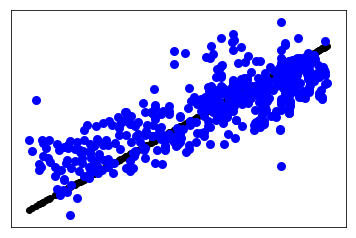

In [112]:
reg_plot(reg, X_test, y_test)

Coefficients: 
 [ 0.1067332   0.03918222  0.05335292 -0.06997249 -0.02052452  0.17531709
 -0.19477814  0.00671066 -0.14387476  0.09553123 -0.07760509 -0.22865877
 -0.0112216   0.01725152 -0.01444092]
Mean squared error: 23326627.27
Mean absolute error: 3572.06
Median absolute error: 2542.71
Variance score: 0.63


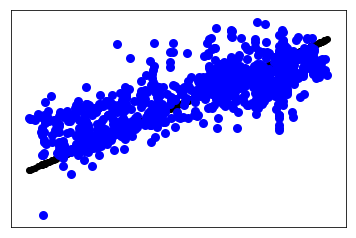

In [113]:
reg_plot(reg, X_train, y_train)

In [120]:
# Retirar os outliers e treinar de novo
new_X = []
new_y = []
y_pred = reg.predict(X_train)
for index, (pred, train) in enumerate(zip(y_pred, y_train)):
    ratio = pred / train
    if ratio > 1.2 or ratio < 0.6:
        pass
        # print(ratio)
    else:
        new_X.append(X_train.iloc[index])
        new_y.append(y_train.iloc[index])

In [121]:
len(new_X)

1047

In [122]:
len(X_train)

1340

In [123]:
reg = model(new_X, new_y)

Alpha 10.0 


Coefficients: 
 [ 0.07755153  0.04945556  0.0215343  -0.04705031 -0.04010167  0.30802925
 -0.34459841  0.18329773 -0.53937779  0.41293788 -0.2568662  -0.5117954
  0.2766662   0.016469    0.02924797]
Mean squared error: 25970426.19
Mean absolute error: 3720.66
Median absolute error: 2564.02
Variance score: 0.54


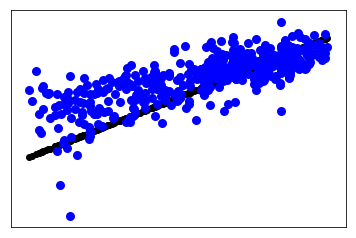

In [124]:
reg_plot(reg, X_test, y_test)

Coefficients: 
 [ 0.07755153  0.04945556  0.0215343  -0.04705031 -0.04010167  0.30802925
 -0.34459841  0.18329773 -0.53937779  0.41293788 -0.2568662  -0.5117954
  0.2766662   0.016469    0.02924797]
Mean squared error: 7954533.08
Mean absolute error: 2360.63
Median absolute error: 2179.17
Variance score: 0.77


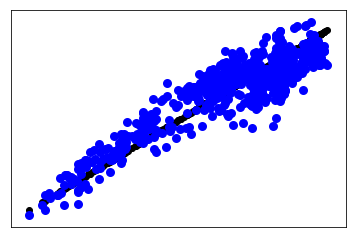

In [125]:
reg_plot(reg, new_X, new_y)

In [126]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=4, random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Mean squared error: 10655529.99
Mean absolute error: 2347.71
Median absolute error: 1841.78
Variance score: 0.81


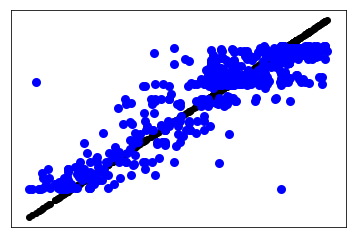

In [129]:
reg_plot(forest, X_test, y_test)

Mean squared error: 11285863.30
Mean absolute error: 2331.38
Median absolute error: 1750.23
Variance score: 0.82


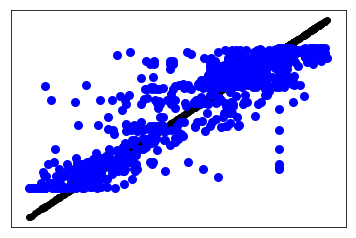

In [130]:
reg_plot(forest, X_train, y_train)

Mean squared error: 20470452.16
Mean absolute error: 3014.61
Median absolute error: 1826.04
Variance score: 0.64


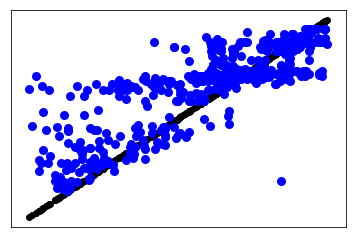

Mean squared error: 4701219.57
Mean absolute error: 1640.41
Median absolute error: 1280.41
Variance score: 0.86


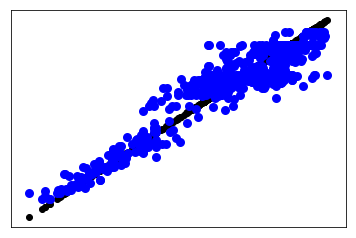

In [132]:
forest.fit(new_X, new_y)
reg_plot(forest, X_test, y_test)
reg_plot(forest, new_X, new_y)